#<font color='naive'>Análise de Dados - Passos Mágicos

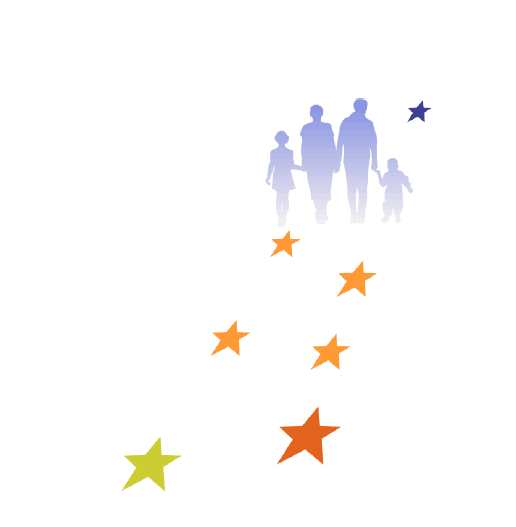

In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import warnings
from datetime import datetime
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import  accuracy_score,  auc,precision_recall_curve
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback


warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
#upload da base de dados

csv = './PEDE_PASSOS_DATASET_FIAP.csv'

base = pd.read_csv(csv, sep=';')

#Analisando e limpando o dataset

In [3]:
df = base.copy()
print(df.shape)
df.head(4)

(1349, 69)


,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.0,5.166667,NaN,3.0,6.250,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [5]:
#visualização geral dos dados das colunas
"""
for i in df.columns:
  print(df[i].value_counts())
  print("*" * 30)"""

'\nfor i in df.columns:\n  print(df[i].value_counts())\n  print("*" * 30)'

In [6]:
#Alterando a coluna NOME

df['NOME'] = df['NOME'].str[6:]


In [7]:
#analisandos os dados das colunas observamos que há diferenças de nomenclatura além de dados que precisam ser excluídos do dataframe
df['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2
V202,1


In [8]:
df['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


In [9]:
#alterando dados das colunas
df = df.replace("Escola Pública","1")
df = df.replace("Rede Decisão/União","2")
df = df.replace("Rede Decisão","2")
df = df.replace("Escola João Paulo II","3")
df = df.replace("Escola JP II","3")
df = df.replace("FIAP","4")
df = df.replace("Estácio","5")
df = df.replace("Einstein","6")
df = df.replace("UNISA","7")
df = df.replace("Não","0")
df = df.replace("Sim","1")
df = df.replace("pedra","Pedra")



In [10]:
fases = {"Nível 2 (5o e 6o ano)" : '2',
      "Nível 3 (7o e 8o ano)" : '3',
      "Nível 4 (9o ano)" : '4',
      "Nível 1 (4o ano)": '1',
      "Nível 5 (1o EM)":'5',
      "ALFA  (2o e 3o ano)" : '0',
      "Nível 6 (2o EM)" : '6',
      "Nível 7 (3o EM)" : '7',
      "Nível 8 (Universitários)" : '8',
      "NaN" : "NaN",
      "Fase 2 (5º e 6º ano)" : '2',
      "Fase 3 (7º e 8º ano)" : '3',
      "Fase 1 (4º ano)" : '1',
      "Fase 4 (9º ano)" : '4',
      "Fase 5 (1º EM)"  : '5',
      "Fase 6 (2º EM)" : '6',
      "Fase 7 (3º EM)" : '7',
      "Fase 8 (Universitários)" : '8' }


def replace_values(value):
    return fases.get(value,value)

df['NIVEL_IDEAL_2021'] = df['NIVEL_IDEAL_2021'].apply(replace_values)
df['NIVEL_IDEAL_2022'] = df['NIVEL_IDEAL_2022'].apply(replace_values)

In [11]:
#criando função para transformar valores  em float

def transforma_coluna(df,colunas):
  for i  in colunas:
    df[i] = pd.to_numeric(df[i], downcast="float").round(2)
  return df

In [12]:
#função para calcular o inde

def calcula_inde(df, fase, ian, ida, ieg, iaa, ips, ipp, ipv):
  if fase < 8:
    inde = (ian * 0.1) + (ida * 0.2)+(ieg * 0.2)+(iaa * 0.1)+(ips * 0.1)+(ipp * 0.1)+(ipv * 0.2)
    inde = inde.round(2)
  else:
    inde = (ian * 0.1) + (ida * 0.4)+(ieg * 0.2)+(iaa * 0.1)+(ips * 0.2)
    inde = inde.round(2)
  return inde

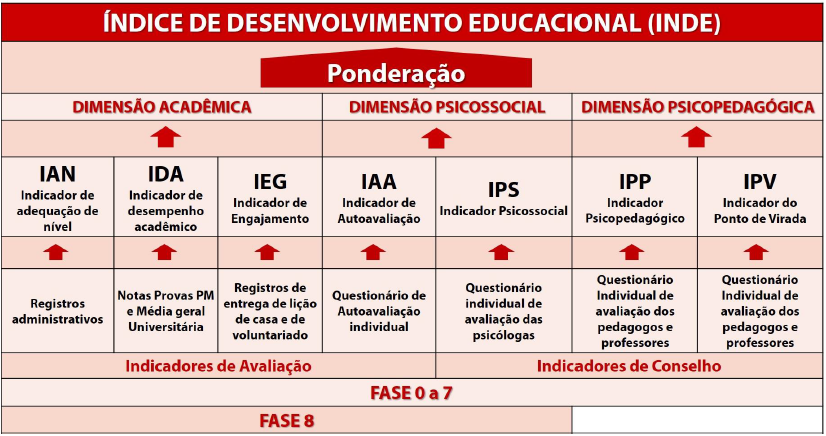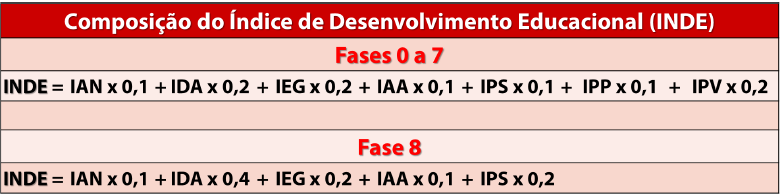

In [13]:
#criando a função para identificar a pedra pelo inde
def pedra(inde):
  if inde > 8.3:
      return 'Topázio'
  elif (6.9 < inde <= 8.3):
      return 'Ametista'
  elif ( 5.5 > inde >= 6.9):
      return 'Ágata'
  else:
      return 'Quartzo'


#criando a função para transformar pedra
def transforma_pedra(pedra):
  if pedra ==  'Quartzo':
    return 1
  elif pedra ==  'Ágata':
    return 2
  elif pedra ==  'Ametista':
    return 3
  else:
    return 4


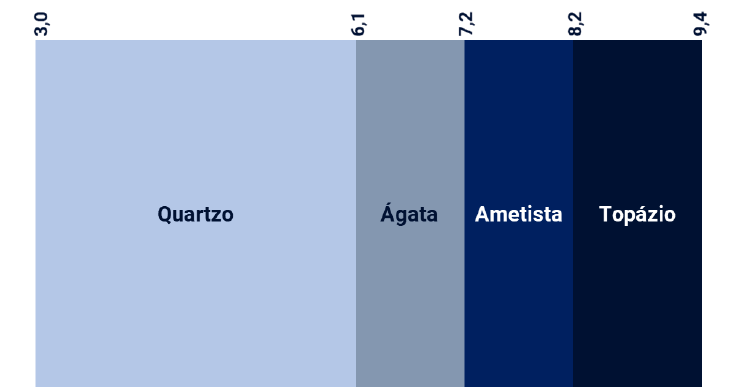

#Criando o df_2020

In [14]:
df_2020 = df[['NOME',
              'FASE_TURMA_2020',
              'INSTITUICAO_ENSINO_ALUNO_2020',
              'ANOS_PM_2020',
              'IAA_2020',
              'IEG_2020',
              'IPS_2020',
              'IDA_2020',
              'IPP_2020',
              'IPV_2020',
              'IAN_2020',
              'INDE_2020',
              'INDE_CONCEITO_2020',
              'PEDRA_2020',
              'PONTO_VIRADA_2020']]

#retirando as linhas que só possuem "NaN"
df_2020 = df_2020[~df_2020[['FASE_TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020',
       'ANOS_PM_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2020', 'INDE_CONCEITO_2020',
       'PEDRA_2020', 'PONTO_VIRADA_2020']].isna().all(axis=1)]

df_2020.head(4)

,NOME,FASE_TURMA_2020,INSTITUICAO_ENSINO_ALUNO_2020,ANOS_PM_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,PONTO_VIRADA_2020
0,1,2H,1,2,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.883752,B,Ametista,0
2,3,3H,1,2,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.856389666666666,B,Ametista,0
3,4,1D,1,2,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,5.076252,D,Quartzo,0
4,5,2M,1,1,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.077085,B,Ametista,0


In [15]:
df_2020.shape

(728, 15)

In [16]:
#criando a coluna fase
df_2020['FASE_2020'] = df_2020['FASE_TURMA_2020'].str.split('').str[1]
df_2020.drop('FASE_TURMA_2020', axis=1, inplace=True)
df_2020['FASE_2020'].unique()

array(['2', '3', '1', '4', '0', '7', '5', '6', '8', 'D'], dtype=object)

In [17]:
len(df_2020['NOME'].unique().tolist())

728

In [18]:
df_2020['FASE_2020'].unique()

array(['2', '3', '1', '4', '0', '7', '5', '6', '8', 'D'], dtype=object)

In [19]:
#criando a coluna ano( representa o ano do PEDE)
df_2020['ANO'] = '2020'

In [20]:
df_2020.groupby('ANO')['NOME'].count()

,NOME
ANO,
2020,728


In [21]:
#analisando os NaN do dataframe
df_2020.isna().sum()

,0
NOME,0
INSTITUICAO_ENSINO_ALUNO_2020,0
ANOS_PM_2020,0
IAA_2020,0
IEG_2020,0
IPS_2020,0
IDA_2020,0
IPP_2020,0
IPV_2020,0
IAN_2020,0


In [22]:
#corriginado a coluna ponto de virada
df_2020['PONTO_VIRADA_2020'] = df_2020['PONTO_VIRADA_2020'].replace(np.nan, '0')
df_2020['PONTO_VIRADA_2020'].value_counts()

,count
PONTO_VIRADA_2020,
0,633
1,94
D9600,1


In [23]:
df_2020.isna().sum()

,0
NOME,0
INSTITUICAO_ENSINO_ALUNO_2020,0
ANOS_PM_2020,0
IAA_2020,0
IEG_2020,0
IPS_2020,0
IDA_2020,0
IPP_2020,0
IPV_2020,0
IAN_2020,0


In [24]:
#criando a coluna bolsista
bolsistas = []
for i in df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].values:
  if i == '1':
    bolsistas.append('0')
  else:
    bolsistas.append('1')

df_2020['BOLSISTA_2020'] = bolsistas
df_2020['BOLSISTA_2020'].value_counts()

,count
BOLSISTA_2020,
0,598
1,130


In [25]:
#analisando a coluna instituição de ensino
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
1,598
2,101
4,11
7,10
5,3
6,2
3,2
V202,1


In [26]:
#excluindo a linha que contém o valor V2020

x = df_2020.loc[df_2020['INSTITUICAO_ENSINO_ALUNO_2020'] =='V202']
x.index[0]
df_2020.drop(x.index[0], axis=0, inplace=True)

In [27]:
df_2020.head(2)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,ANOS_PM_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,PONTO_VIRADA_2020,FASE_2020,ANO,BOLSISTA_2020
0,1,1,2,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.883752,B,Ametista,0,2,2020,0
2,3,1,2,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.856389666666666,B,Ametista,0,3,2020,0


In [28]:
#observamos que os há números float que precisam ser padronizados
colunas = ['IAA_2020','IEG_2020', 'IPS_2020', 'IDA_2020', 'IAN_2020', 'INDE_2020','IPP_2020', 'IPV_2020']
df_2020 = transforma_coluna(df_2020, colunas)
df_2020.head(2)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,ANOS_PM_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,PONTO_VIRADA_2020,FASE_2020,ANO,BOLSISTA_2020
0,1,1,2,8.50,8.7,7.5,7.0,5.94,7.75,10.0,7.88,B,Ametista,0,2,2020,0
2,3,1,2,7.92,8.9,7.5,5.5,8.12,8.11,10.0,7.86,B,Ametista,0,3,2020,0


In [29]:
#analisando a colunas de anos no projeto
df_2020['ANOS_PM_2020'].info()

<class 'pandas.core.series.Series'>
Index: 727 entries, 0 to 1347
Series name: ANOS_PM_2020
Non-Null Count  Dtype 
--------------  ----- 
727 non-null    object
dtypes: object(1)
memory usage: 27.5+ KB


In [30]:
#alterando os dados da coluna anos_pm para se tornas a coluna ano_ingresso
df_2020['ANOS_PM_2020'] = df_2020['ANOS_PM_2020'].replace('0',2020)
df_2020['ANOS_PM_2020'] = df_2020['ANOS_PM_2020'].replace('1',2019)
df_2020['ANOS_PM_2020'] = df_2020['ANOS_PM_2020'].replace('2',2018)
df_2020['ANOS_PM_2020'] = df_2020['ANOS_PM_2020'].replace('3',2017)
df_2020['ANOS_PM_2020'] = df_2020['ANOS_PM_2020'].replace('4',2016)

df_2020['ANO_INGRESSO_2020'] = df_2020['ANOS_PM_2020']
df_2020.drop('ANOS_PM_2020', axis=1, inplace=True)
df_2020['ANO_INGRESSO_2020'].value_counts()

,count
ANO_INGRESSO_2020,
2019,305
2018,156
2020,134
2017,78
2016,54


In [31]:
#verificando as colunas
"""for i in df_2020.columns:
  print(df_2020[i].sort_values()[:10])
  print("*" * 30)"""


'for i in df_2020.columns:\n  print(df_2020[i].sort_values()[:10])\n  print("*" * 30)'

In [32]:
#alterando o nome das colunas
df_2020.columns =['nome','instituicao_ensino_aluno', 'iaa', 'ieg', 'ips',
       'ida', 'ipp', 'ipv', 'ian', 'inde','inde_conceito', 'pedra', 'ponto_virada', 'fase',
       'ano', 'bolsista', 'ano_ingresso']
df_2020.head(3)

,nome,instituicao_ensino_aluno,iaa,ieg,ips,ida,ipp,ipv,ian,inde,inde_conceito,pedra,ponto_virada,fase,ano,bolsista,ano_ingresso
0,1,1,8.50,8.7,7.50,7.0,5.94,7.75,10.0,7.88,B,Ametista,0,2,2020,0,2018
2,3,1,7.92,8.9,7.50,5.5,8.12,8.11,10.0,7.86,B,Ametista,0,3,2020,0,2018
3,4,1,8.00,4.1,6.88,0.0,7.19,7.75,5.0,5.08,D,Quartzo,0,1,2020,0,2018


In [33]:
df_2020[['nome', 'fase', 'pedra']].groupby(['fase', 'pedra'])['nome'].count()

fase  pedra   
0     Ametista    42
      Quartzo      1
      Topázio     26
      Ágata       13
1     Ametista    85
      Quartzo     23
      Topázio     25
      Ágata       39
2     Ametista    73
      Quartzo     30
      Topázio     10
      Ágata       42
3     Ametista    55
      Quartzo     18
      Topázio     14
      Ágata       35
4     Ametista    26
      Quartzo     15
      Topázio      7
      Ágata        7
5     Ametista    24
      Quartzo     15
      Topázio      3
      Ágata       12
6     Ametista     7
      Quartzo     16
      Ágata        7
7     Ametista    16
      Quartzo      6
      Topázio      3
      Ágata        8
8     Ametista     8
      Quartzo      4
      Topázio      4
      Ágata        8
Name: nome, dtype: int64

Podemos observar que analisando os dados de PEDRA, há evidência de que a fase 6 requer uma maior atenção em face da maioria dos alunos encontrar-se na classificação de Quartzo, o que destoa das outras fases que apresentam a pedra Ametista com uma maior frequência entre os alunos.

#Criando o df_2021

In [34]:
df_2021 = df[['NOME',
              'INSTITUICAO_ENSINO_ALUNO_2021',
              'IAA_2021',
              'IEG_2021',
              'IPS_2021',
              'IDA_2021',
              'IPP_2021',
              'IPV_2021',
              'IAN_2021',
              'INDE_2021',
              'PEDRA_2021',
              'PONTO_VIRADA_2021',
              'NIVEL_IDEAL_2021',
              'FASE_2021',
              'SINALIZADOR_INGRESSANTE_2021',
              'DEFASAGEM_2021']]

df_2021 = df_2021[~df_2021[['INSTITUICAO_ENSINO_ALUNO_2021', 'IAA_2021', 'IEG_2021',
       'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2021',
       'PEDRA_2021', 'PONTO_VIRADA_2021', 'NIVEL_IDEAL_2021', 'FASE_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'DEFASAGEM_2021']].isna().all(axis=1)]

df_2021['ANO'] = '2021'
df_2021.head(3)

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,SINALIZADOR_INGRESSANTE_2021,DEFASAGEM_2021,ANO
0,1,2,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.319,Ametista,0,3,2.0,Ingressante,-1.0,2021
2,3,1,7.1,6.9,6.3,5.6,7.3,7.2,10.0,7.021,Ametista,0,3,3.0,Veterano,0.0,2021
4,5,1,7.4,7.5,7.5,5.4,8.5,7.4,10.0,7.399,Ametista,0,2,2.0,Veterano,0.0,2021


In [35]:
df_2021.groupby('ANO')['NOME'].count()

,NOME
ANO,
2021,686


In [36]:
df_2021.isna().sum()

,0
NOME,0
INSTITUICAO_ENSINO_ALUNO_2021,0
IAA_2021,0
IEG_2021,0
IPS_2021,0
IDA_2021,0
IPP_2021,0
IPV_2021,0
IAN_2021,0
INDE_2021,0


In [37]:
#verificando as colunas
"""for i in df_2021.columns:
  print(df_2021[i].value_counts())
  print("*" * 30)"""

'for i in df_2021.columns:\n  print(df_2021[i].value_counts())\n  print("*" * 30)'

In [38]:
df_2021['FASE_2021'].unique()

array([2., 3., 5., 1., 0., 4., 7., 6.])

In [39]:
#analisando a coluna fase
df_2021['FASE_2021'] = pd.to_numeric(df_2021['FASE_2021'], downcast='integer')
df_2021['FASE_2021'] = df_2021['FASE_2021'].astype('string')
df_2021['FASE_2021'].unique()

<StringArray>
['2', '3', '5', '1', '0', '4', '7', '6']
Length: 8, dtype: string

In [40]:
#analisando os dados da coluna da instituição de ensino
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
1,557
2,127
3,2


In [41]:
#criando a coluna bolsista
bolsistas = []
for i in df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].values:
  if i == '1':
    bolsistas.append('0')
  else:
    bolsistas.append('1')

df_2021['BOLSISTA_2021'] = bolsistas
df_2021['BOLSISTA_2021'].value_counts()

,count
BOLSISTA_2021,
0,557
1,129


In [42]:
#analisando a coluna sinal_ingressando para obter dados para a coluna ano_ingresso
ingressante = []
for i in df_2021['SINALIZADOR_INGRESSANTE_2021'].values:
  if i == 'Ingressante':
    ingressante.append(2021)
  else:
    ingressante.append('-')

df_2021['SINALIZADOR_INGRESSANTE_2021'] = ingressante
df_2021['SINALIZADOR_INGRESSANTE_2021'].value_counts()

,count
SINALIZADOR_INGRESSANTE_2021,
-,437
2021,249


In [43]:
#criando a coluna ano_ingresso
df_2021['ANO_INGRESS0_2021'] = df_2021['SINALIZADOR_INGRESSANTE_2021']
df_2021.drop('SINALIZADOR_INGRESSANTE_2021', axis=1, inplace=True)

In [44]:
df_2021.head(2)

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,DEFASAGEM_2021,ANO,BOLSISTA_2021,ANO_INGRESS0_2021
0,1,2,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.319,Ametista,0,3,2,-1.0,2021,1,2021
2,3,1,7.1,6.9,6.3,5.6,7.3,7.2,10.0,7.021,Ametista,0,3,3,0.0,2021,0,-


In [45]:
#padronizando o tipo númerico das colunas
colunas = ['IAA_2021','IEG_2021', 'IPS_2021', 'IDA_2021', 'IAN_2021','IPP_2021', 'IPV_2021']
df_2021 = transforma_coluna(df_2021, colunas)

In [46]:
df_2021['DEFASAGEM_2021'] = pd.to_numeric(df_2021['DEFASAGEM_2021'], downcast="integer")

In [47]:
#analisando a coluna INDE observando que há dados faltantes
df_2021.loc[df_2021['INDE_2021'] =='#NULO!']

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,DEFASAGEM_2021,ANO,BOLSISTA_2021,ANO_INGRESS0_2021
70,71,1,7.4,0.0,5.0,3.6,0.0,0.0,5.0,#NULO!,#NULO!,#NULO!,2,0,-2,2021,0,-
505,506,1,7.4,0.0,5.0,4.1,0.0,0.0,10.0,#NULO!,#NULO!,#NULO!,0,0,0,2021,0,-


In [48]:
#calculando o inde
df_2021.loc[70]

,70
NOME,71
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,3.6
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,5.0
INDE_2021,#NULO!


In [49]:
#Vou calcular o INDE- FASE 0

ian = df_2021['IAN_2021'].loc[70]
ida = df_2021['IDA_2021'].loc[70]
ieg = df_2021['IEG_2021'].loc[70]
iaa = df_2021['IAA_2021'].loc[70]
ips = df_2021['IPS_2021'].loc[70]
ipp = df_2021['IPS_2021'].loc[70]
ipv = df_2021['IPP_2021'].loc[70]

df_2021['INDE_2021'].loc[70] = calcula_inde(df_2021, 0, ian, ida, ieg, iaa, ips, ipp, ipv)
df_2021.loc[70]

,70
NOME,71
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,3.6
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,5.0
INDE_2021,2.96


Posteriormente poderemos corrigir a pedra desse aluno.

In [50]:
df_2021.loc[505]

,505
NOME,506
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,4.1
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,10.0
INDE_2021,#NULO!


In [51]:
#Vou calcular o INDE -FASE 0

ian = df_2021['IAN_2021'].loc[505]
ida = df_2021['IDA_2021'].loc[505]
ieg = df_2021['IEG_2021'].loc[505]
iaa = df_2021['IAA_2021'].loc[505]
ips = df_2021['IPS_2021'].loc[505]
ipp = df_2021['IPS_2021'].loc[505]
ipv = df_2021['IPP_2021'].loc[505]

df_2021['INDE_2021'].loc[505] = calcula_inde(df_2021, 0, ian, ida, ieg, iaa, ips, ipp, ipv)
df_2021.loc[505]


,505
NOME,506
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,4.1
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,10.0
INDE_2021,3.56


In [52]:
#padronizando os valores da coluna INDE
colunas = ['INDE_2021']
df_2021 = transforma_coluna(df_2021, colunas)
df_2021.head(2)

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,DEFASAGEM_2021,ANO,BOLSISTA_2021,ANO_INGRESS0_2021
0,1,2,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.32,Ametista,0,3,2,-1,2021,1,2021
2,3,1,7.1,6.9,6.3,5.6,7.3,7.2,10.0,7.02,Ametista,0,3,3,0,2021,0,-


In [53]:
#analisando a coluna PEDRA
df_2021.loc[df_2021['PEDRA_2021'] =='#NULO!']

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,DEFASAGEM_2021,ANO,BOLSISTA_2021,ANO_INGRESS0_2021
70,71,1,7.4,0.0,5.0,3.6,0.0,0.0,5.0,2.96,#NULO!,#NULO!,2,0,-2,2021,0,-
505,506,1,7.4,0.0,5.0,4.1,0.0,0.0,10.0,3.56,#NULO!,#NULO!,0,0,0,2021,0,-


In [54]:
#corrigindo os dados da coluna PEDRA
inde = df_2021['INDE_2021'].loc[70]
nome_pedra = pedra(inde)

df_2021['PEDRA_2021'].loc[70] = nome_pedra
df_2021.loc[70]

,70
NOME,71
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,3.6
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,5.0
INDE_2021,2.96


In [55]:
inde = df_2021['INDE_2021'].loc[505]
nome_pedra = pedra(inde)

df_2021['PEDRA_2021'].loc[505] = nome_pedra
df_2021.loc[505]

,505
NOME,506
INSTITUICAO_ENSINO_ALUNO_2021,1
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0
IDA_2021,4.1
IPP_2021,0.0
IPV_2021,0.0
IAN_2021,10.0
INDE_2021,3.56


In [56]:
df_2021['PONTO_VIRADA_2021'].value_counts()

,count
PONTO_VIRADA_2021,
0,576
1,108
#NULO!,2


In [57]:
#analisando a coluna ponto_virada
df_2021.loc[df_2021['PONTO_VIRADA_2021'] =='#NULO!']

,NOME,INSTITUICAO_ENSINO_ALUNO_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,INDE_2021,PEDRA_2021,PONTO_VIRADA_2021,NIVEL_IDEAL_2021,FASE_2021,DEFASAGEM_2021,ANO,BOLSISTA_2021,ANO_INGRESS0_2021
70,71,1,7.4,0.0,5.0,3.6,0.0,0.0,5.0,2.96,Quartzo,#NULO!,2,0,-2,2021,0,-
505,506,1,7.4,0.0,5.0,4.1,0.0,0.0,10.0,3.56,Quartzo,#NULO!,0,0,0,2021,0,-


In [58]:
#corrigindo os dados da coluna
df_2021['PONTO_VIRADA_2021'] = df_2021['PONTO_VIRADA_2021'].replace("#NULO!","0")

In [59]:
#analisando a coluna defasagem
df_2021['DEFASAGEM_2021'].value_counts()

,count
DEFASAGEM_2021,
-1,317
0,249
-2,93
1,16
-3,8
-4,2
3,1


In [60]:
df_2021.columns =['nome','instituicao_ensino_aluno', 'iaa', 'ieg', 'ips',
        'ida', 'ipp', 'ipv', 'ian', 'inde','pedra', 'ponto_virada', 'nivel_ideal',
        'fase', 'defasagem', 'ano', 'bolsista', 'ano_ingresso']
df_2021.head(2)

,nome,instituicao_ensino_aluno,iaa,ieg,ips,ida,ipp,ipv,ian,inde,pedra,ponto_virada,nivel_ideal,fase,defasagem,ano,bolsista,ano_ingresso
0,1,2,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.32,Ametista,0,3,2,-1,2021,1,2021
2,3,1,7.1,6.9,6.3,5.6,7.3,7.2,10.0,7.02,Ametista,0,3,3,0,2021,0,-


Vamos corrigir as inconsistências da coluna ano_ingresso

## Solucionando as inconsistências de valores em ano_ingresso

In [61]:
#criando listas com os dados de 2020 e 2021

nomes_2020 = df_2020['nome'].values
nomes_2021 = df_2021['nome'].values
ano_2020 = df_2020['ano_ingresso'].values
ano_2021 = df_2021['ano_ingresso'].replace('-', 10000).values

In [62]:
#verificando a quantidade de alunos de cada ano
len(nomes_2020),len(nomes_2021)

(727, 686)

In [63]:
#criando um dataframe para o ano 2020
data = {'nome':nomes_2020, 'ano_2020':ano_2020}
concat20 = pd.DataFrame(data)
concat20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nome      727 non-null    object
 1   ano_2020  727 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [64]:
#criando um dataframe para o ano 2021
data = {'nome': nomes_2021, 'ano_2021':ano_2021}
concat21 = pd.DataFrame(data)
concat21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nome      686 non-null    object
 1   ano_2021  686 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.8+ KB


In [65]:
#unindo os dataframes de 2020 e 2021 para copiaros dados de ano_ingresso de 2020 para 2021 e corrigir as inconsistências encontradas
anos_concatenado = pd.merge(concat20, concat21, how='outer', on='nome')
anos_concatenado = anos_concatenado.set_index('nome')
anos_concatenado.tail()

,ano_2020,ano_2021
nome,,
1330,NaN,10000.0
1332,NaN,2021.0
1334,NaN,2021.0
1335,NaN,2021.0
1345,NaN,2021.0


In [66]:
#anos_concatenado = anos_concatenado.replace('NaN',10000)
anos_concatenado.tail()

,ano_2020,ano_2021
nome,,
1330,NaN,10000.0
1332,NaN,2021.0
1334,NaN,2021.0
1335,NaN,2021.0
1345,NaN,2021.0


In [67]:
#criando uma coluna para unificar e corrigir os valores de ano_ingresso
anos_concatenado['ano_inicial'] = anos_concatenado[['ano_2020','ano_2021']].min(axis=1)
anos_concatenado['ano_inicial'] = pd.to_numeric(anos_concatenado['ano_inicial'], downcast="integer")
anos_concatenado['ano_inicial'].unique()

array([ 2018,  2019,  2017,  2020,  2016,  2021, 10000], dtype=int16)

In [68]:
df.loc[df['NOME']== '176']

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
175,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,I,1,Veterano,Ágata,5.674,7.5,6.3,5.0,4.3,6.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,0,5.7,5.0,3,-1.0,3.0,G,2017.0,0,5.096608,816.0,125.0,10.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,6.66666,7.391026,5.0,2.888889,2.333333,4.166667,2.166667,4.0,5.15625,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Alocado em Fase anterior,0,0,4.291672,5.0,4


In [69]:
anos_concatenado.loc[anos_concatenado['ano_inicial']==10000]

,ano_2020,ano_2021,ano_inicial
nome,,,
176,NaN,10000.0,10000
336,NaN,10000.0,10000
432,NaN,10000.0,10000
706,NaN,10000.0,10000
781,NaN,10000.0,10000
897,NaN,10000.0,10000
995,NaN,10000.0,10000
1096,NaN,10000.0,10000
1201,NaN,10000.0,10000


Podemos observar que houve um erro de cadastro de dados, pois os alunos aparecem na base de 2021 contudo não contém dados de ano de ingreso no projeto. Vamos aguardar a juntada da base do ano de 2022 para regularizar os dados.

In [70]:
#verificando a coluna

anos_concatenado['ano_inicial'].unique()

array([ 2018,  2019,  2017,  2020,  2016,  2021, 10000], dtype=int16)

In [71]:
anos_concatenado

,ano_2020,ano_2021,ano_inicial
nome,,,
1,2018.0,2021.0,2018
3,2018.0,10000.0,2018
4,2018.0,NaN,2018
5,2019.0,10000.0,2019
8,2017.0,10000.0,2017
...,...,...,...
1330,NaN,10000.0,10000
1332,NaN,2021.0,2021
1334,NaN,2021.0,2021


In [72]:
#criando um dataframe provisório para extrair os dados dos alunos de 2021
df_provisorio = anos_concatenado.reset_index()
df_provisorio.drop(['ano_2020','ano_2021'], axis=1, inplace=True)
df_provisorio['nome'] = pd.to_numeric(df_provisorio['nome'], downcast="integer")
df_provisorio.set_index('nome', inplace=True)
nomes_ = [int(x) for x in nomes_2021 if x != 'NaN']

#corrigindo a coluna ano_ingresso do dataframe df_2021
df_2021['ano_ingresso'] = df_provisorio.loc[nomes_,'ano_inicial'].to_list()

In [73]:
#excluindo as colunas desnecessárias
anos_concatenado.drop(['ano_2020','ano_2021'], axis=1, inplace=True)


In [74]:
df_2021.head()

,nome,instituicao_ensino_aluno,iaa,ieg,ips,ida,ipp,ipv,ian,inde,pedra,ponto_virada,nivel_ideal,fase,defasagem,ano,bolsista,ano_ingresso
0,1,2,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.32,Ametista,0,3,2,-1,2021,1,2018
2,3,1,7.1,6.9,6.3,5.6,7.3,7.2,10.0,7.02,Ametista,0,3,3,0,2021,0,2018
4,5,1,7.4,7.5,7.5,5.4,8.5,7.4,10.0,7.40,Ametista,0,2,2,0,2021,0,2019
7,8,2,8.8,8.6,7.5,7.1,8.0,8.5,10.0,8.27,Topázio,0,5,5,0,2021,1,2017
10,11,2,9.0,10.0,6.3,8.8,7.7,9.7,10.0,8.99,Topázio,1,1,1,0,2021,1,2020


# Criando o df_2022

In [75]:
df_2022 = df[['NOME',
              'IAA_2022',
              'IEG_2022',
              'IPS_2022',
              'IDA_2022',
              'IPP_2022',
              'IPV_2022',
              'IAN_2022',
              'INDE_2022',
              'PEDRA_2022',
              'FASE_2022',
              'PONTO_VIRADA_2022',
              'ANO_INGRESSO_2022',
              'BOLSISTA_2022',
              'NIVEL_IDEAL_2022',
              'INDICADO_BOLSA_2022']]

df_2022 = df_2022[~df_2022[['IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022',
       'IPV_2022', 'IAN_2022', 'INDE_2022', 'PEDRA_2022', 'FASE_2022',
       'PONTO_VIRADA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'NIVEL_IDEAL_2022','INDICADO_BOLSA_2022']].isna().all(axis=1)]

df_2022['ANO'] = '2022'


In [76]:
df_2022.groupby('ANO')['NOME'].count()

,NOME
ANO,
2022,862


In [77]:
#alterando a coluna ponto virada para binária
df_2022['PONTO_VIRADA_2022'] = df_2022['PONTO_VIRADA_2022'].replace(np.nan, '0')
df_2022['PONTO_VIRADA_2022'].value_counts()

,count
PONTO_VIRADA_2022,
0,749
1,113


In [78]:
"""for i in df_2022.columns:
  print(df_2022[i].value_counts())
  print("*" * 30)"""

'for i in df_2022.columns:\n  print(df_2022[i].value_counts())\n  print("*" * 30)'

In [79]:
#padronizando os valores numéricos
colunas = ['IAA_2022','IEG_2022', 'IPS_2022', 'IDA_2022', 'IAN_2022','IPP_2022', 'IPV_2022', 'INDE_2022']
df_2022 = transforma_coluna(df_2022, colunas)

In [80]:
#criando a coluna ano_ingresso

lista = df_2022['ANO_INGRESSO_2022'].values
lista = lista.astype(np.int64)
df_2022['ANO_INGRESSO_2022']= lista
df_2022['ANO_INGRESSO_2022'].value_counts()

,count
ANO_INGRESSO_2022,
2022,398
2021,141
2019,139
2018,67
2020,48
2017,40
2016,29


In [81]:
#analisando a coluna fase
df_2022['FASE_2022'] = pd.to_numeric(df_2022['FASE_2022'], downcast='integer')
df_2022['FASE_2022'] = df_2022['FASE_2022'].astype('string')
df_2022['FASE_2022'].unique()

<StringArray>
['0', '2', '1', '5', '4', '3', '7', '6']
Length: 8, dtype: string

In [82]:
df_2022.head()

,NOME,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022,INDE_2022,PEDRA_2022,FASE_2022,PONTO_VIRADA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,NIVEL_IDEAL_2022,INDICADO_BOLSA_2022,ANO
1,2,10.00,7.58,7.5,8.82,5.62,7.92,5.0,7.68,Ametista,0,0,2022,0,2,1,2022
3,4,10.00,8.07,7.5,5.08,6.25,8.06,5.0,7.12,Ametista,2,0,2022,0,3,0,2022
4,5,6.42,8.56,7.5,7.08,6.46,7.83,5.0,7.23,Ametista,2,0,2019,0,3,0,2022
5,6,9.00,9.33,7.5,5.50,6.25,7.50,10.0,7.74,Ametista,2,0,2022,0,2,0,2022
6,7,10.00,9.31,7.5,5.58,5.94,7.92,5.0,7.41,Ametista,1,0,2022,0,2,0,2022


In [83]:
#padronizando as colunas

df_2022.columns = ['nome','iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv',
       'ian', 'inde', 'pedra', 'fase', 'ponto_virada',
       'ano_ingresso', 'bolsista', 'nivel_ideal',
       'indicado_bolsa', 'ano']
df_2022.tail(2)

,nome,iaa,ieg,ips,ida,ipp,ipv,ian,inde,pedra,fase,ponto_virada,ano_ingresso,bolsista,nivel_ideal,indicado_bolsa,ano
1347,1348,8.33,9.18,5.62,5.9,6.72,5.83,5.0,6.75,Ágata,4,0,2018,1,5,0,2022
1348,1349,7.92,7.54,7.50,4.5,7.50,6.00,5.0,6.40,Ágata,3,0,2022,0,5,1,2022


##Buscando inconsistências no ano_ingresso do PEDE2022

In [84]:
nomes_2022 = df_2022['nome']
ano_2022 = df_2022['ano_ingresso'].fillna(int(10000))
#criando um dataframe para o ano 2022
data = {'nome': nomes_2022, 'ano_2022': ano_2022}
concat22 = pd.DataFrame(data)
concat22.info(),
concat22.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nome      862 non-null    object
 1   ano_2022  862 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 52.5+ KB


,nome,ano_2022
1341,1342,2022
1342,1343,2018
1345,1346,2022
1347,1348,2018
1348,1349,2022


In [85]:
#unindo os dataframes para copiar os dados de ano_ingresso de 2020/2021 para 2022 e corrigir as inconsistências encontradas

anos_concatenado_final = pd.merge(anos_concatenado, concat22, how='outer', on='nome')
print(anos_concatenado_final.shape)
anos_concatenado_final = anos_concatenado_final.set_index('nome')


anos_concatenado_final['ano_inicial'] = anos_concatenado_final['ano_inicial'].replace(np.nan, int(10000))
anos_concatenado_final.tail()

(1348, 3)


,ano_inicial,ano_2022
nome,,
1337,10000.0,2022.0
1340,10000.0,2022.0
1342,10000.0,2022.0
1346,10000.0,2022.0
1349,10000.0,2022.0


In [86]:
anos_concatenado_final['ano_2022'].unique()

array([  nan, 2022., 2019., 2017., 2020., 2018., 2016., 2021.])

In [87]:
anos_concatenado_final['ano_2022'] = pd.to_numeric(anos_concatenado_final['ano_2022'], downcast="integer")
anos_concatenado_final['ano_2022'] = anos_concatenado_final['ano_2022'].replace(np.nan, 10000)

In [88]:
#criando uma coluna para unificar e corrigir os valores de ano_ingresso
anos_concatenado_final['ano_inicial_'] = anos_concatenado_final[['ano_inicial','ano_2022']].min(axis=1)
anos_concatenado_final['ano_inicial_'] = pd.to_numeric(anos_concatenado_final['ano_inicial_'], downcast="integer")
anos_concatenado_final['ano_inicial_'].tail()

,ano_inicial_
nome,
1337,2022
1340,2022
1342,2022
1346,2022
1349,2022


In [89]:
#verificando a coluna

anos_concatenado_final['ano_inicial_'].unique()

array([ 2018,  2019,  2017,  2020,  2016,  2021, 10000,  2022],
      dtype=int16)

In [90]:
anos_concatenado_final

,ano_inicial,ano_2022,ano_inicial_
nome,,,
1,2018.0,10000.0,2018
3,2018.0,10000.0,2018
4,2018.0,2022.0,2018
5,2019.0,2019.0,2019
8,2017.0,2017.0,2017
...,...,...,...
1337,10000.0,2022.0,2022
1340,10000.0,2022.0,2022
1342,10000.0,2022.0,2022


In [91]:
#criando um dataframe provisório para extrair os dados dos alunos de 2021
anos_concatenado_final =anos_concatenado_final.reset_index()
df_provisorio_2022 = anos_concatenado_final[['nome', 'ano_inicial_']]
df_provisorio_2022['nome'] = pd.to_numeric(df_provisorio_2022['nome'], downcast="integer")
df_provisorio_2022.set_index('nome', inplace=True)
nomes_2 = [int(x) for x in nomes_2022 if x != 'NaN']

#corrigindo a coluna ano_ingresso do dataframe df_2021
df_2022['ano_ingresso'] = df_provisorio_2022.loc[nomes_2,'ano_inicial_'].to_list()
df_2022['ano_ingresso'].unique()

array([2022, 2018, 2019, 2017, 2020, 2021, 2016])

In [92]:
#criando um dataframe provisório para extrair os dados dos alunos de 2021

df_provisorio_2021 = anos_concatenado_final.reset_index()
df_provisorio_2021['nome'] = pd.to_numeric(df_provisorio_2021['nome'], downcast="integer")
df_provisorio_2021.set_index('nome', inplace=True)
nomes_ = [int(x) for x in nomes_2021 if x != 'NaN']

#corrigindo a coluna ano_ingresso do dataframe df_2021
df_2021['ano_ingresso'] = df_provisorio_2021.loc[nomes_,'ano_inicial_'].to_list()
df_2021['ano_ingresso'].unique()

array([ 2018,  2019,  2017,  2020,  2021,  2016, 10000])

In [93]:
df_10000 = df_2021.loc[df_2021['ano_ingresso']==10000].set_index('nome')
lista_ind = df_10000.index
for i in lista_ind:
  print(f'Nomes dos alunos: {lista_ind}')
  print(f'Aluno {i}:')
  print(df_2021.loc[df_2021 ['nome'] == i])
  print(30*'*')

Nomes dos alunos: Index(['897', '1096', '1201', '1326'], dtype='object', name='nome')
Aluno 897:
    nome instituicao_ensino_aluno  iaa  ieg  ips  ida  ipp  ipv  ian  inde  \
896  897                        1  7.9  3.3  6.9  4.3  6.7  4.8  5.0  5.14   

       pedra ponto_virada nivel_ideal fase  defasagem   ano bolsista  \
896  Quartzo            0           4    3         -1  2021        0   

     ano_ingresso  
896         10000  
******************************
Nomes dos alunos: Index(['897', '1096', '1201', '1326'], dtype='object', name='nome')
Aluno 1096:
      nome instituicao_ensino_aluno   iaa  ieg  ips  ida  ipp  ipv   ian  \
1095  1096                        2  10.0  8.9  7.5  7.5  8.3  9.7  10.0   

      inde    pedra ponto_virada nivel_ideal fase  defasagem   ano bolsista  \
1095  8.81  Topázio            1           3    3          0  2021        1   

      ano_ingresso  
1095         10000  
******************************
Nomes dos alunos: Index(['897', '1096', '1201',

Observamos que os alunos que apresentaram como ano_ingresso '10000' não constam em outros PEDE's exceto no ano de 2021, o que nos faz supor que o aluno tenha ingressado em 2021.  

In [94]:
#corrigindo os dados do dataframe df_2021
df_2021['ano_ingresso'].replace(10000, int(2021), inplace=True)
df_2021.loc[df_2021['ano_ingresso']==10000]

,nome,instituicao_ensino_aluno,iaa,ieg,ips,ida,ipp,ipv,ian,inde,pedra,ponto_virada,nivel_ideal,fase,defasagem,ano,bolsista,ano_ingresso


In [95]:
#excluindo as colunas desnecessárias
anos_concatenado_final.drop(['ano_inicial','ano_2022'], axis=1, inplace=True)


In [96]:
df_2022.tail()

,nome,iaa,ieg,ips,ida,ipp,ipv,ian,inde,pedra,fase,ponto_virada,ano_ingresso,bolsista,nivel_ideal,indicado_bolsa,ano
1341,1342,7.92,9.67,7.50,7.75,6.25,7.50,10.0,8.15,Topázio,2,0,2022,0,2,0,2022
1342,1343,7.42,6.47,6.25,2.00,6.25,7.44,5.0,5.67,Quartzo,2,0,2018,0,4,0,2022
1345,1346,9.00,9.03,7.50,9.00,5.62,9.08,5.0,8.14,Topázio,0,1,2022,0,1,0,2022
1347,1348,8.33,9.18,5.62,5.90,6.72,5.83,5.0,6.75,Ágata,4,0,2018,1,5,0,2022
1348,1349,7.92,7.54,7.50,4.50,7.50,6.00,5.0,6.40,Ágata,3,0,2022,0,5,1,2022


#Criando o df_final_passos

In [97]:
colunas_2020 = df_2020[['nome', 'ano', 'bolsista', 'fase', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde', 'pedra', 'ponto_virada', 'ano_ingresso']]
colunas_2021 = df_2021[['nome', 'ano', 'bolsista', 'fase', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde', 'pedra', 'ponto_virada', 'ano_ingresso']]
colunas_2022 = df_2022[['nome', 'ano', 'bolsista', 'fase', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde', 'pedra', 'ponto_virada', 'ano_ingresso']]

#concatenando os dados
df_final_passos = pd.concat([colunas_2020, colunas_2021, colunas_2022],ignore_index=True)
df_final_passos.head()

df_final_passos.to_csv('df_final_passos.csv', index=True)

In [98]:
df_final_passos.shape

(2275, 15)

In [99]:
len(df_final_passos['nome'].unique())

1348

Os dados foram coletados de 1348 alunos, dispersos nos PEDE's de 2020,02021 e 2022.

In [100]:
df_final_passos.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
iaa,2275.0,8.26,2.01,0.00,7.92,8.75,9.50,10.00
ieg,2275.0,7.50,2.21,0.00,6.30,8.10,9.20,10.00
ips,2275.0,6.83,1.30,0.00,6.25,7.50,7.50,10.00
ida,2275.0,5.96,2.43,0.00,4.50,6.33,7.67,10.00
ipp,2275.0,6.93,1.54,0.00,6.25,7.30,7.92,10.00
ipv,2275.0,7.29,1.51,0.00,6.77,7.50,8.17,10.00
ian,2275.0,6.89,2.51,2.50,5.00,5.00,10.00,10.00
inde,2275.0,7.07,1.20,2.47,6.39,7.28,7.94,9.71
ano_ingresso,2275.0,2019.49,1.72,2016.00,2018.00,2019.00,2021.00,2022.00


Podemos observar que nenhum aluno obteve a nota máxima no INDE.

In [101]:
df_final_passos['fase'].unique()

array(['2', '3', '1', '4', '0', '7', '5', '6', '8'], dtype=object)

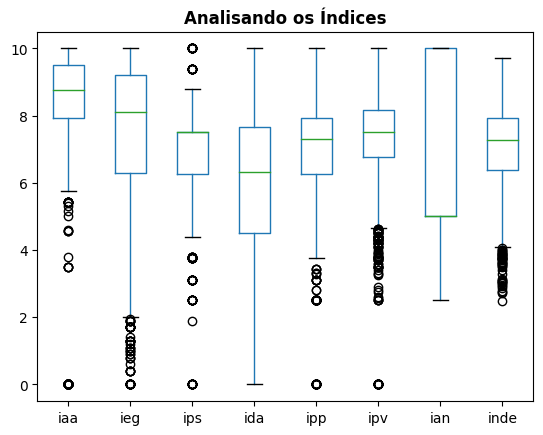

In [102]:
df_final_passos.boxplot(column=['iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde'])
plt.title('Analisando os Índices', fontweight='bold')
plt.grid(False)
plt.show()

Observamos no boxplot as outliers dos índice. As notas do IAN foram bem elevadas o que ficou bem evidente na análise do gráfico.

In [103]:
#analisando a coluna ano_ingresso
df_final_passos['ano_ingresso'].unique()

array([2018, 2019, 2017, 2020, 2016, 2021, 2022])

A insitiuição apresentou alunos com ingresso no projeto no período de 2016 a 2022.

#Criando o df_virada_por_ano

OBS: Avaliando a quantidade de alunos que tiveram viradas por ano distribuído pelas fases no projeto.

In [104]:
df_final_passos["ponto_virada"].value_counts()

,count
ponto_virada,
0,1960
1,315


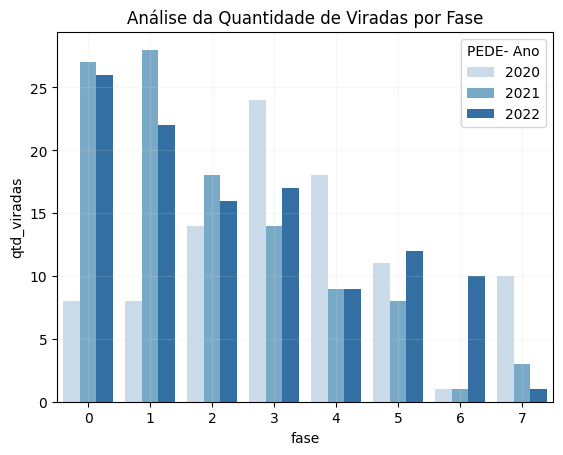

In [105]:
df_virada_por_ano = df_final_passos[["nome","ano","ponto_virada","fase"]]
df_virada_por_ano  = df_virada_por_ano .query('ponto_virada != "0"')
df_virada_por_ano  = pd.DataFrame(df_virada_por_ano .groupby(['ano','fase'])['nome'].count())
df_virada_por_ano ['qtd_viradas'] = df_virada_por_ano ['nome']
df_virada_por_ano .drop('nome', axis=1, inplace=True)
plt.title('Análise da Quantidade de Viradas por Fase')
sns.barplot(data =df_virada_por_ano , x='fase', y='qtd_viradas',hue='ano', palette='Blues')
plt.grid(color='lightgray', alpha=0.2)
plt.legend(title= "PEDE- Ano")
plt.show()

A fase 6 apresenta a menor quantidade de viradas nos anos 2020 e 2021, com uma acentuada melhora no ano de 2022. Contudo em 2022, a fase que apresentou menor quantidade de viradas foi a fase 7.

#Criando o df_ano_ingresso

OBS: Avaliando os dados agrupados por ano_ingresso

In [106]:
df_ano_pedra_por_ingresso = df_final_passos[['ano','ano_ingresso','nome','pedra']]
df_ano_pedra_por_ingresso = pd.DataFrame(df_ano_pedra_por_ingresso.groupby(['ano','ano_ingresso','pedra'])['nome'].count())
df_ano_pedra_por_ingresso['qtd_alunos'] = df_ano_pedra_por_ingresso['nome']
df_ano_pedra_por_ingresso.drop('nome', axis=1, inplace=True)
df_ano_pedra_por_ingresso.head()

qtd_alunos
ano  ano_ingresso pedra               
2020 2016         Ametista          31
                  Quartzo           12
                  Topázio            7
                  Ágata              4
     2017         Ametista          41

In [107]:
df_ano_pedra_por_ingresso

qtd_alunos
ano  ano_ingresso pedra               
2020 2016         Ametista          31
                  Quartzo           12
                  Topázio            7
                  Ágata              4
     2017         Ametista          41
...                                ...
2022 2021         Ágata             29
     2022         Ametista         168
                  Quartzo           45
                  Topázio           56
                  Ágata            118

[72 rows x 1 columns]

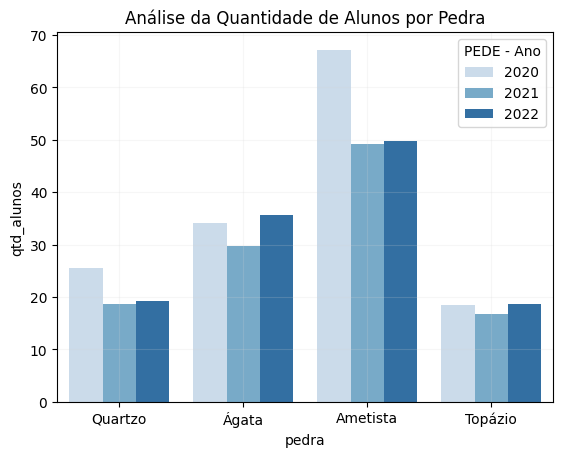

In [108]:
plt.title('Análise da Quantidade de Alunos por Pedra')
ax=sns.barplot(data =df_ano_pedra_por_ingresso, x='pedra', y='qtd_alunos',hue='ano',order= ['Quartzo', 'Ágata', 'Ametista', 'Topázio'], palette='Blues', ci=None)
plt.grid(color='lightgray', alpha=0.2)
plt.legend(title= "PEDE - Ano")
plt.show()

* Para entedermos melhor o gráfico acima, algumas considerações precisam ser feitas:
  - Para aquisição do conceito PEDRA é utilizado a valor do INDE obtido pelo aluno.
  -As pedras são obtidas conforme faixa de valores pré-estabelecidas, com seguinte ordem crescente( Quartzo, Ágata, Ametista e Topázio).
* Houve um aumento no número de alunos que obtiveram o conceito de pedra ÁGATA (pedra que requer INDE de 5.5 a 6.9), o que é um bom indicativo, por supostamente, representar uma migração mediante uma melhoria do indicativo INDE dos alunos do QUARTZO( que apresentou diminuição de frequência  em 2021 e 2022).
* Em contraponto observamos a diminuição dos alunos que obtiveram a pedra AMETISTA, que é conceito que necessita de um maior valor de INDE( na faixa de  7,2 a 8,3).

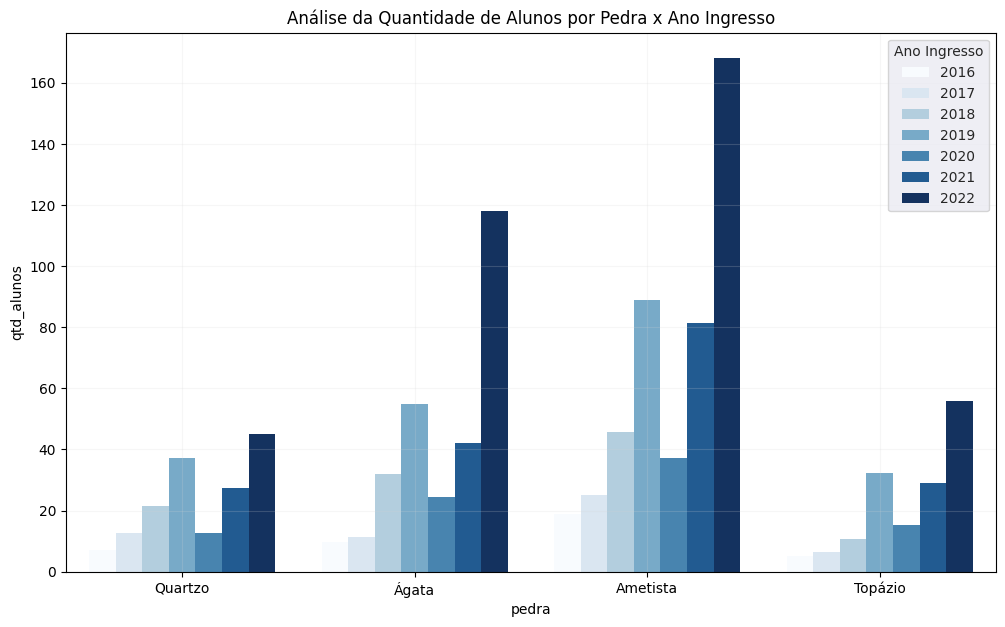

In [109]:
plt.figure(figsize=(12,7))
plt.title('Análise da Quantidade de Alunos por Pedra x Ano Ingresso')
ax = sns.barplot(data =df_ano_pedra_por_ingresso, x='pedra', y='qtd_alunos',hue='ano_ingresso', order= ['Quartzo', 'Ágata', 'Ametista', 'Topázio'],palette='Blues',ci=None)
plt.grid(color='lightgray', alpha=0.2)
sns.set_style("darkgrid")
plt.legend(title= "Ano Ingresso")
plt.show()

No gráfico, visualizamos que a maioria dos alunos que obtiveram conceito de pedra TOPÁZIO foram os alunos que ingressaram em 2022.

#Criando o df_virada_por_ingresso

OBS: Avaliar a quantidade de virada agrupadas por ano, ano_ingresso e bolsista

In [110]:
df_virada_por_ingresso = df_final_passos[['ano', 'ano_ingresso', 'ponto_virada', 'bolsista']]
df_virada_por_ingresso = df_virada_por_ingresso.query('ponto_virada != "0" ')
df_virada_por_ingresso = pd.DataFrame(df_virada_por_ingresso.groupby(['ano','ano_ingresso','bolsista'])['ponto_virada'].count())
df_virada_por_ingresso['qtd_viradas'] = df_virada_por_ingresso['ponto_virada']
df_virada_por_ingresso.drop('ponto_virada', axis=1, inplace=True)
df_virada_por_ingresso.head()

qtd_viradas
ano  ano_ingresso bolsista             
2020 2016         0                   3
                  1                   8
     2017         0                   3
                  1                  18
     2018         0                  10

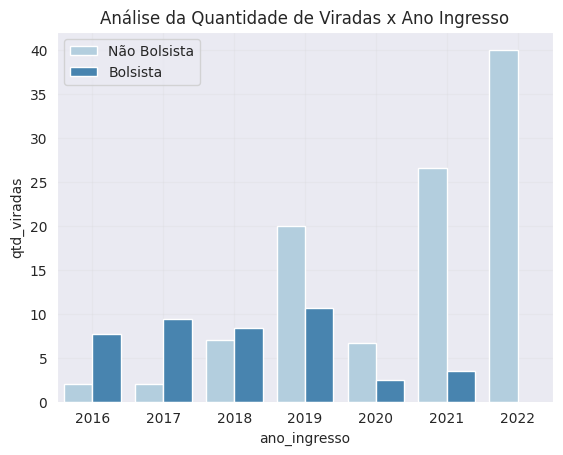

In [111]:
plt.title('Análise da Quantidade de Viradas x Ano Ingresso')
sns.barplot(data =df_virada_por_ingresso, x='ano_ingresso', y='qtd_viradas',hue='bolsista', ci=None, palette='Blues')
plt.grid(color='lightgray', alpha=0.2)
plt.legend(loc='upper left', labels=['Não Bolsista', 'Bolsista'])
plt.show()

#Criando o df_por_aluno




In [112]:
df_por_aluno = df_final_passos[['nome','bolsista','ano_ingresso','ano','iaa','ieg','ips','ida','ipp','ipv','ian','inde']].groupby(['nome','ano']).agg(lambda x: x)
df_por_aluno

bolsista  ano_ingresso   iaa    ieg   ips   ida   ipp   ipv   ian  \
nome ano                                                                      
1    2020        0          2018  8.50   8.70  7.50  7.00  5.94  7.75  10.0   
     2021        1          2018  7.50   6.30  6.90  8.80  7.70  8.10   5.0   
10   2020        0          2019  5.83   5.20  3.75  0.00  7.97  6.83  10.0   
100  2020        0          2018  9.00   6.50  4.38  7.50  6.88  7.92   5.0   
     2021        0          2018  8.50   0.00  3.80  0.00  6.30  3.80   5.0   
...            ...           ...   ...    ...   ...   ...   ...   ...   ...   
997  2021        1          2019  8.50  10.00  5.00  8.60  7.90  9.50  10.0   
     2022        1          2019  6.92   9.21  4.38  8.00  6.46  8.72  10.0   
998  2022        0          2022  9.50   9.67  5.62  6.17  5.62  7.50  10.0   
999  2020        1          2018  8.33   5.80  3.12  7.33  6.88  7.72  10.0   
     2021        1          2018  7.90   6.10  4.40  6.40  6.90  7.20  10.0   

           inde  
nome ano         
1    2020  7.88  
     2021  7.32  
10   2020  5.16  
100  2020  6.91  
     2021  3.12  
...         ...  
997  2021  8.77  
     2022  7.96  
998  2022  7.74  
999  2020  7.00  
     2021  6.86  

[2275 rows x 10 columns]

12


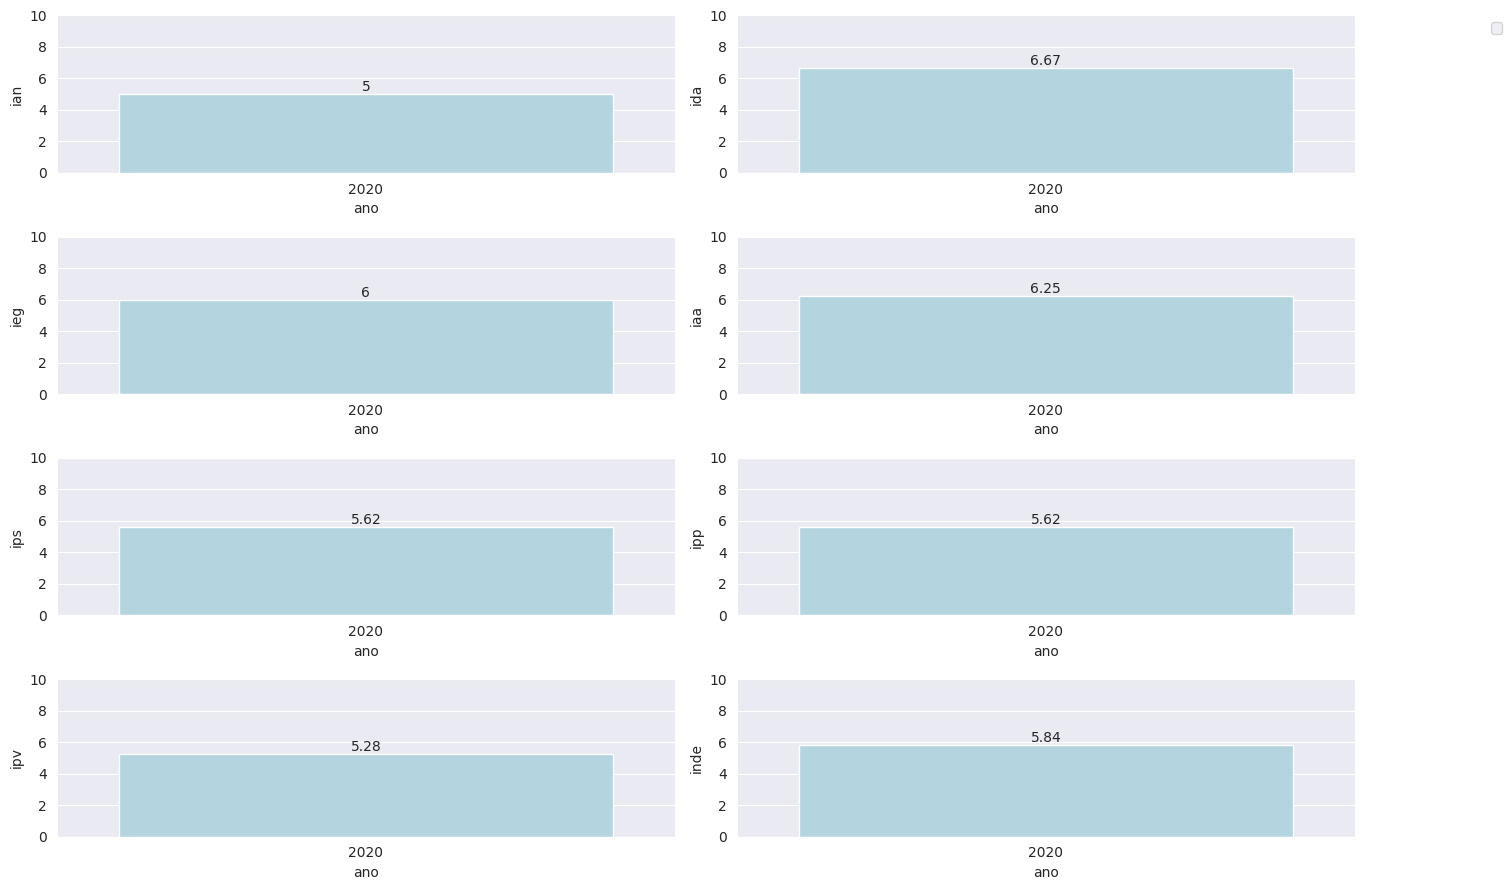

In [113]:
# Análise individual do aluno
id_aluno = input(str())
def analise_aluno(aluno):

    df = pd.DataFrame(df_por_aluno.query("nome == @aluno"))
    df = df[['bolsista','iaa','ieg', 'ips','ida','ipp','ipv','ian','inde']]


    fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(15,9), layout="constrained")


    ax1 = sns.barplot(x='ano', y='ian', data = df, ax=axes[0][0], legend=False, palette=['lightblue','gray'])
    ax1.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax1.bar_label(ax1.containers[i], fontsize=10)


    ax2 = sns.barplot(x='ano',y='ida', data=df, ax=axes[0][1],  palette=['lightblue', 'gray'])
    ax2.set_ylim(0,10)
    ax2.legend(bbox_to_anchor=(1.25,1), loc='upper right')
    for i in range(0,len(df.index.tolist())):
      ax2.bar_label(ax2.containers[i], fontsize=10)


    ax3 = sns.barplot(x='ano', y='ieg', data=df, ax=axes[1][0], legend=False, palette=['lightblue', 'gray'])
    ax3.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax3.bar_label(ax3.containers[i], fontsize=10)


    ax4 = sns.barplot( x='ano', y='iaa', data=df, ax=axes[1][1], legend=False, palette=['lightblue', 'gray'])
    ax4.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax4.bar_label(ax4.containers[i], fontsize=10)


    ax5 = sns.barplot(x='ano', y='ips', data=df, ax=axes[2][0], legend=False, palette=['lightblue', 'gray'])
    ax5.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax5.bar_label(ax5.containers[i], fontsize=10)


    ax6 = sns.barplot(x='ano', y='ipp', data=df, ax=axes[2][1], legend=False, palette=['lightblue', 'gray'])
    ax6.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax6.bar_label(ax6.containers[i], fontsize=10)


    ax7 = sns.barplot(x='ano', y='ipv', data=df, ax=axes[3][0], legend=False, palette=['lightblue', 'gray'])
    ax7.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax7.bar_label(ax7.containers[i], fontsize=10)


    ax8= sns.barplot(x='ano',y='inde', data=df, ax=axes[3][1], legend=False, palette=['lightblue', 'gray'])
    ax8.set_ylim(0,10)
    for i in range(0,len(df.index.tolist())):
      ax8.bar_label(ax8.containers[i], fontsize=10)


    plt.tight_layout()
    plt.show()

analise_aluno(id_aluno)

Podemos ter uma visão geral dos índices do aluno e perceber quais as maiores dificuldades a fim de promover melhorias individualizadas. No exemplo acima, escolhi o aluno "1" para a análise.

In [114]:
df = df_final_passos[['nome', 'ano_ingresso', 'ano']].groupby('ano')['nome'].count()
df

,nome
ano,
2020,727
2021,686
2022,862


#Criando o df_media_por_aluno

In [115]:
df_media_por_aluno = df_final_passos[['nome', 'iaa','ieg','ips','ida','ipp','ipv','ian','inde']].groupby(['nome']).mean().round(2)
df_media_por_aluno

,iaa,ieg,ips,ida,ipp,ipv,ian,inde
nome,,,,,,,,
1,8.00,7.50,7.20,7.90,6.82,7.92,7.50,7.60
10,5.83,5.20,3.75,0.00,7.97,6.83,10.00,5.16
100,8.83,4.99,4.39,3.06,6.48,6.39,5.00,5.36
1000,9.50,8.09,7.50,2.00,6.46,6.61,10.00,6.69
1001,9.25,9.23,6.56,7.49,7.01,8.88,7.50,8.16
...,...,...,...,...,...,...,...,...
995,8.00,7.78,6.88,3.70,6.66,7.66,5.00,6.48
996,8.83,7.09,6.67,6.26,7.09,7.36,8.33,7.23
997,8.14,9.60,6.46,8.53,7.49,8.66,10.00,8.57


In [116]:
aluno = '1'
df=df_media_por_aluno.query("nome == @aluno")
print(df)

def min(df):
  lista_col = df.columns.tolist()
  df_min = 10.0
  ind_min=[]
  for i in range(0, 8):
    ind_min = lista_col[i]
    for i in lista_col:
      if [df[i][0] <= df_min]:
        df_min = df[i]
    return 'O indicador que o aluno obteve menor nota foi {} com a nota {:.2f}.'.format(ind_min,df_min[0])
print(" ")
min(df)

      iaa  ieg  ips  ida   ipp   ipv  ian  inde
nome                                           
1     8.0  7.5  7.2  7.9  6.82  7.92  7.5   7.6
 


'O indicador que o aluno obteve menor nota foi iaa com a nota 7.60.'

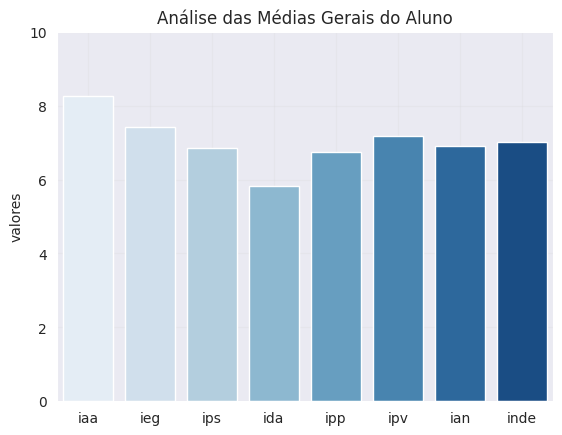

In [117]:
#Visualizando os valores médios dos índices do aluno 1
aluno = '1'
df=df_media_por_aluno.query("nome == @aluno")

sns.barplot(df_media_por_aluno, ci=None, palette='Blues');
plt.title('Análise das Médias Gerais do Aluno')
plt.xticks(rotation=360)
plt.ylabel('valores')
plt.ylim(0,10)
plt.grid(color='lightgray', alpha=0.2)
plt.show()

A partir dessa visualização podemos inferir qual os pontos que merecem maior atenção da instituição e focar para melhoria do aluno.

#Criando df_virada_por_aluno

OBS: Analisando a quantidade de viradas por aluno

In [118]:
df_virada_por_aluno = df_final_passos.query('ponto_virada == "1"').groupby('nome')['ponto_virada'].count().value_counts().sort_index()
df_virada_por_aluno


,count
ponto_virada,
1,190
2,40
3,15


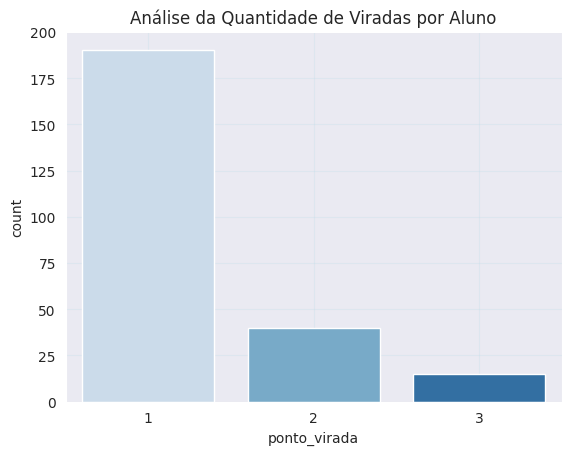

In [119]:
plt.title('Análise da Quantidade de Viradas por Aluno')
sns.barplot(df_virada_por_aluno, palette='Blues')
plt.grid(alpha=0.2, color='lightblue')
plt.ylim(0,200)
plt.show()

Podemos observar que a grande maioria dos alunos obteve apenas uma vez a aprovação do ponto de virada nos três anos analisados, o que pode indicar que necessita de um reforço de trabalho a fim de intensificar a frequência de viradas e acelerar o processo de desenvolvimento do aluno.

#Analisando os valores do  INDE

In [120]:
#outliers
px.box(data_frame=df_final_passos, x='ano', y='inde', title="Analisando as médias do INDE")

In [121]:
print(f'INDE mínimo:',df_final_passos['inde'].min()),
inde_medio = df_final_passos['inde'].mean().round(2)
print(f'INDE médio:',inde_medio),
print(f'INDE máximo:',df_final_passos['inde'].max()),
print(f'Percentual de alunos que apresentaram INDE MÉDIO (calculado entre os  PEDE 2020, 2021 e 2022) abaixo da média de {inde_medio:.2f}: ',(df_final_passos[df_final_passos['inde'] <= inde_medio]['nome'].count() /df_final_passos['nome'].count() * 100).round(2), '%')

INDE mínimo: 2.47
INDE médio: 7.07
INDE máximo: 9.71
Percentual de alunos que apresentaram INDE MÉDIO (calculado entre os  PEDE 2020, 2021 e 2022) abaixo da média de 7.07:  43.3 %


Os valores do INDE estão bem discrepantes com outliers significados variando de 2.47 a 9.71, dentro de uma escala de 1 a 10. Observamos que o percentual de alunos com INDE abaixo da média é de 43.3% o que pode ser considerado um valor relevante dentro de todo o universo de alunos. Contudo, se analisarmos o contexto dos anos de 2020 a 2022, podemos extrair que estávamos em um momento crítico para toda a população o que pode ter afetado significativamente o desempenho escolar dos alunos.

#Criando o df_medias_por_ano

In [122]:
df_medias_por_ano = df_final_passos[['ano', 'ian', 'ida', 'ieg', 'iaa', 'ips', 'ipp', 'ipv', 'inde', 'bolsista']].groupby(['ano'], as_index=False).mean(numeric_only=True).round(2)
df_medias_por_ano = df_medias_por_ano.set_index('ano')



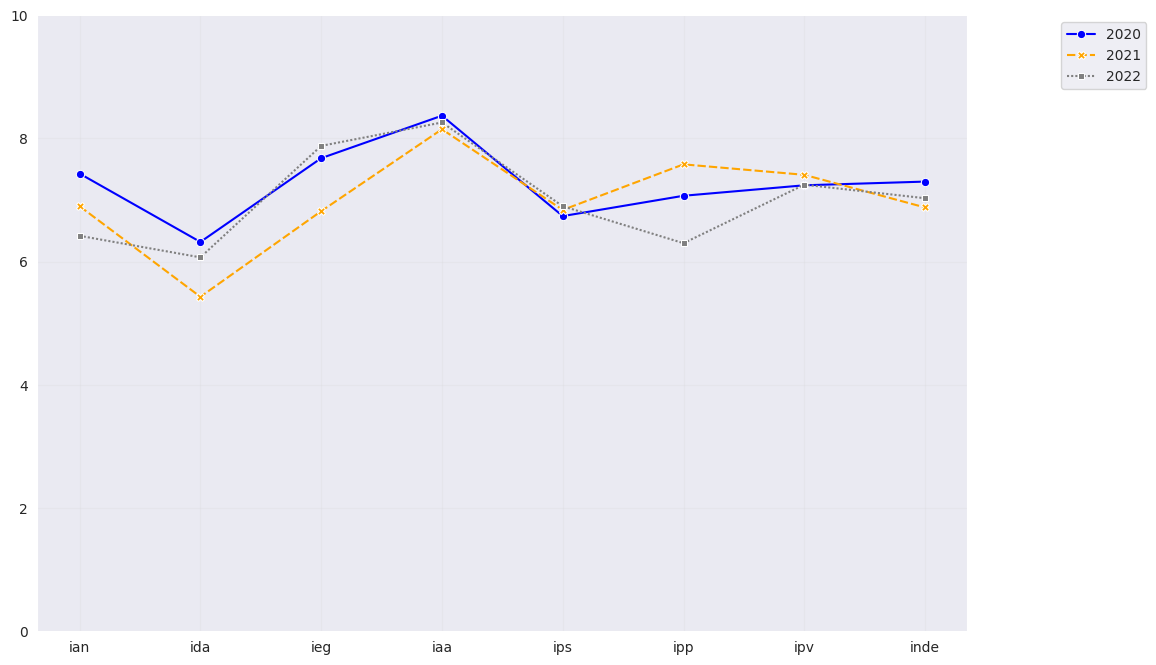

In [123]:
plt.figure(figsize=(12,8))
sns.lineplot(df_medias_por_ano.T, markers=True, palette=['blue','orange','gray'])
plt.legend(bbox_to_anchor=(1.2,1))
plt.ylim(0,10)
plt.grid(color='lightgray', alpha=0.2)
plt.show()

Analisando a médias dos alunos por ano, podemos observar uma melhor média no ano de 2020 na maioria dos índices do PEDE.

#Criando o df_medias_bolsista_por_ano

In [124]:
df_medias_bolsista_por_ano = df_final_passos[['ano', 'ian', 'ida', 'ieg', 'iaa', 'ips', 'ipp', 'ipv', 'inde', 'bolsista']].groupby(['ano','bolsista']).mean(numeric_only=True).round(2)
df_medias_bolsista_por_ano


ian   ida   ieg   iaa   ips   ipp   ipv  inde
ano  bolsista                                                
2020 0         7.09  6.14  7.61  8.35  6.78  7.26  7.39  7.18
     1         8.99  7.16  8.01  8.47  6.53  6.20  6.54  7.85
2021 0         6.62  5.08  6.66  8.11  6.89  7.49  7.27  6.71
     1         8.12  6.91  7.55  8.36  6.62  7.93  7.99  7.59
2022 0         6.23  5.92  7.79  8.30  6.97  6.12  7.15  6.93
     1         7.73  7.12  8.54  8.01  6.45  7.56  7.96  7.70

O dataframe acima corrobora com as informações do gráfico anterior, no qual as médias do ano de 2020 foram as de maior pontuação e o mesmo se apresenta para aluno bolsista e não bolsista.

# Criando o df_bolsista

In [125]:
df_bolsista = df_final_passos[['ano', 'ian', 'ida', 'ieg', 'iaa', 'ips', 'ipp', 'ipv', 'inde', 'bolsista']].groupby('bolsista', as_index=False).mean(numeric_only=True).round(2)
df_bolsista.head()

,bolsista,ian,ida,ieg,iaa,ips,ipp,ipv,inde
0,0,6.62,5.75,7.4,8.26,6.89,6.88,7.26,6.94
1,1,8.31,7.06,8.0,8.29,6.54,7.21,7.47,7.71


As médias comparativas entre alunos bolsistas e não bolsistas pode demonstrar que há uma evidente vantagem ao aluno que obtém bolsa de estudo em escola particular, seja por um ensino de melhor qualidade ou pelo esforço pessoal do mesmo em face da obtenção da valorização do benefício.

#Criando df_por_fase

In [126]:
df_por_fase = df_final_passos[['nome','ano','fase', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde']].groupby(['fase','ano']).mean(numeric_only=True).round(2)
df_por_fase

iaa   ieg   ips   ida   ipp   ipv    ian  inde
fase ano                                                  
0    2020  8.91  9.88  6.81  8.97  5.69  6.80   7.50  8.02
     2021  8.91  7.80  6.95  5.73  6.93  7.63   7.09  7.23
     2022  8.98  8.09  7.01  7.13  5.31  7.56   6.80  7.37
1    2020  8.72  7.83  6.89  7.07  7.13  7.68   6.34  7.42
     2021  8.34  7.51  7.13  4.78  7.78  7.71   5.96  6.92
     2022  8.64  8.52  7.08  6.45  5.86  7.36   5.74  7.20
2    2020  8.26  7.92  6.73  5.13  7.37  7.67   7.34  7.11
     2021  7.29  6.20  7.04  5.11  7.67  7.39   6.70  6.61
     2022  8.41  8.16  6.82  5.40  6.16  7.34   6.40  6.96
3    2020  8.55  7.41  6.60  6.40  7.91  7.47   7.81  7.34
     2021  8.22  5.96  6.84  5.46  7.51  7.05   7.50  6.70
     2022  7.48  7.07  6.72  5.13  7.30  6.55   6.99  6.60
4    2020  8.63  6.93  7.08  5.02  8.25  7.73   7.45  7.08
     2021  8.40  6.31  6.55  5.75  7.85  7.02   7.42  6.83
     2022  7.71  7.66  6.61  6.05  7.42  7.21   6.48  7.01
5    2020  8.22  6.97  6.13  5.05  7.68  7.11   7.27  6.84
     2021  7.97  6.65  6.20  6.01  7.88  7.34   6.90  6.89
     2022  8.10  7.34  6.86  5.87  6.59  7.26   6.25  6.88
6    2020  4.72  6.07  6.56  4.13  7.45  7.30   8.67  6.24
     2021  8.20  7.12  5.68  6.40  7.73  7.28   6.96  7.01
     2022  6.50  7.03  7.95  6.69  7.86  8.22   5.83  7.20
7    2020  8.13  7.15  6.76  5.71  7.46  7.79   9.24  7.29
     2021  8.58  7.84  6.42  6.79  8.01  7.71   8.95  7.66
     2022  6.76  6.92  6.47  4.85  6.95  6.98   6.09  6.38
8    2020  8.38  5.00  6.95  8.70  0.00  0.00  10.00  7.71

#Criando o df_bolsista_por_por_fase

In [127]:
df_bolsista_por_fase = pd.DataFrame(df_final_passos.query('bolsista == "1"').groupby(by=['fase','ano'])['nome'].count())
df_bolsista_por_fase.columns= ['qtd_alunos']
df_bolsista_por_fase.head()

qtd_alunos
fase ano             
0    2020           2
     2022           2
1    2020           4
     2021           5
     2022           7

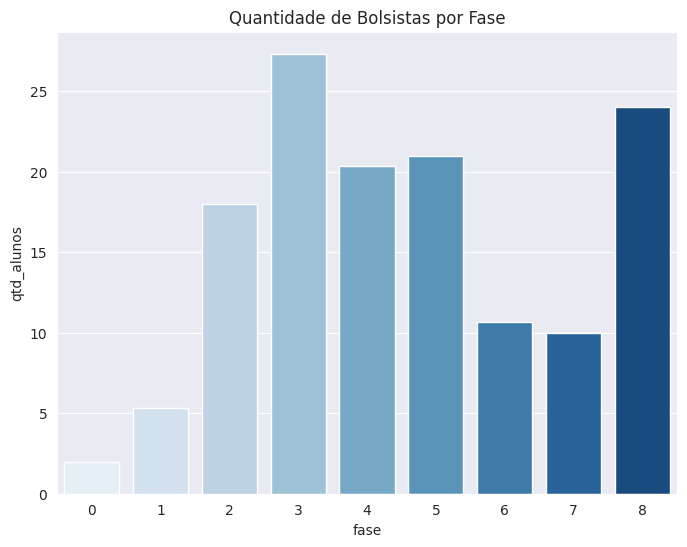

In [128]:
plt.figure(figsize=(8,6))
sns.barplot(df_bolsista_por_fase.reset_index(), x='fase', y='qtd_alunos', ci=None, palette='Blues')
plt.title('Quantidade de Bolsistas por Fase')
plt.show()

As fase 3 e 8 concentram a maioria dos bolsistas da organização. Em contrapartida, as fases 0 e 1 possuem a menor quantidade de alunos que obtiveram a bolsa de estudos.

#Criando o df_bolsista_por_ano

In [129]:
df_bolsista_por_ano = df_final_passos.query('bolsista == "1"').groupby(by=['ano'])['nome'].count()
df_bolsista_por_ano

,nome
ano,
2020,129
2021,129
2022,108


De acordo com os dados, a quantidade de alunos bolsistas diminuiu em 2022.

#Diferenciação de INDE

In [130]:
df_diff = df_2020[['nome', 'inde']]
df_diff.columns = ['nome','inde_2020']
df_diff = pd.merge(df_diff, df_2021[['nome','inde']], how='outer', on='nome')
df_diff.columns = ['nome','inde_2020', 'inde_2021']
df_diff['afastamento_da_media_do_inde2020'] = (df_diff['inde_2021'] - df_diff['inde_2020'].mean()).round(2)
df_diff = pd.merge(df_diff, df_2022[['nome','inde']], how='outer', on='nome')
df_diff.columns = ['nome','inde_2020', 'inde_2021','afastamento_da_media_do_inde2020', 'inde_2022']
df_diff['afastamento_da_media_do_inde2021'] = (df_diff['inde_2022'] - df_diff['inde_2021'].mean()).round(2)
df_diff

,nome,inde_2020,inde_2021,afastamento_da_media_do_inde2020,inde_2022,afastamento_da_media_do_inde2021
0,1,7.88,7.32,0.02,NaN,NaN
1,3,7.86,7.02,-0.28,NaN,NaN
2,4,5.08,NaN,NaN,7.12,0.24
3,5,8.08,7.40,0.10,7.23,0.35
4,8,8.38,8.27,0.97,7.29,0.41
...,...,...,...,...,...,...
1343,1337,NaN,NaN,NaN,6.15,-0.73
1344,1340,NaN,NaN,NaN,5.03,-1.85
1345,1342,NaN,NaN,NaN,8.15,1.27
1346,1346,NaN,NaN,NaN,8.14,1.26


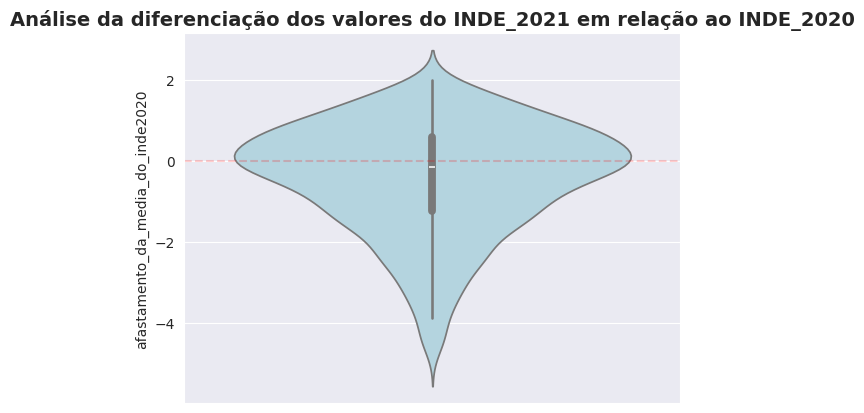

In [131]:

sns.violinplot(df_diff['afastamento_da_media_do_inde2020'], color='lightblue')
plt.title('Análise da diferenciação dos valores do INDE_2021 em relação ao INDE_2020', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='red', linestyle ='--', alpha=0.2)
plt.show()

Conforme o gráfico, a diferenciação foi de queda nos valores do INDE 2021 em relação ao INDE 2020.

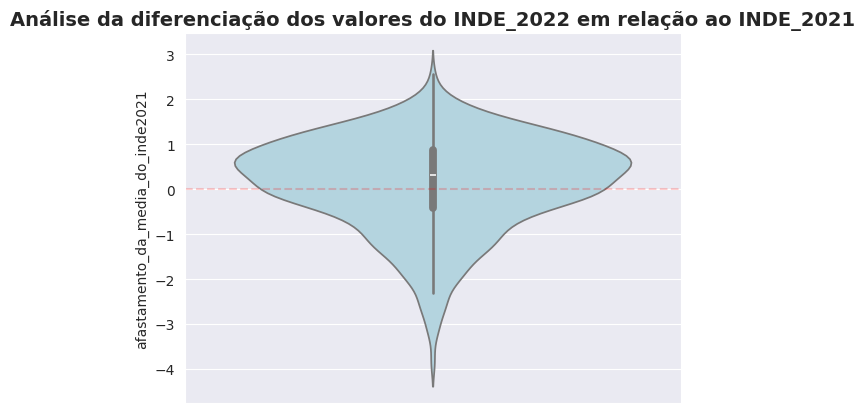

In [132]:
#plt.figure(figsize=(15,9))
sns.violinplot(df_diff['afastamento_da_media_do_inde2021'],color='lightblue')
plt.title('Análise da diferenciação dos valores do INDE_2022 em relação ao INDE_2021', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.2)
plt.show()

Podemos observar os valores do INDE 2022 em um movimento crescente em relação ao INDE 2021.

#Plotando e analisando os dados

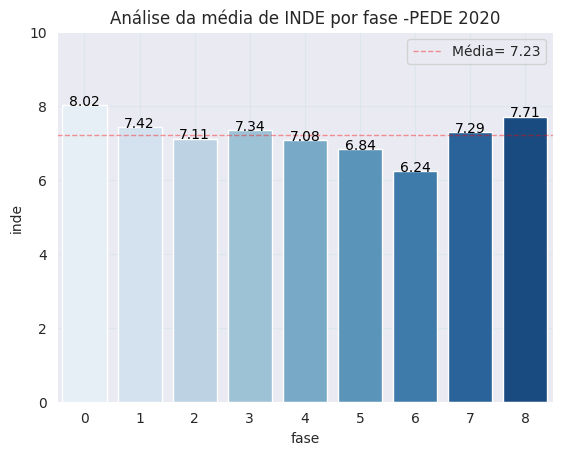

In [133]:
plt.title('Análise da média de INDE por fase -PEDE 2020')
x1 =  pd.DataFrame(df_2020[['nome', 'inde', 'fase']].groupby('fase')['inde'].mean())
media = x1.inde.values.mean()
sns.barplot(data=x1, x='fase', y='inde', palette='Blues')
for index, value in enumerate(x1.inde.values):
      plt.text(index, value, round(value, 2), color='black', ha="center")
plt.grid(alpha=0.2, color='lightblue')
plt.axhline(y =x1.inde.values.mean(),linewidth=1, color='r', label='Média= {:.2f}'.format(media),alpha=0.4 ,linestyle='dashed')
plt.legend()
plt.ylim(0,10)
plt.show()

No PEDE 2020, os alunos das fase 2, 4, 5 e 6 obtiveram médias abaixo da média geral do INDE. A maior média de pontuação obtida foi da fase 0.

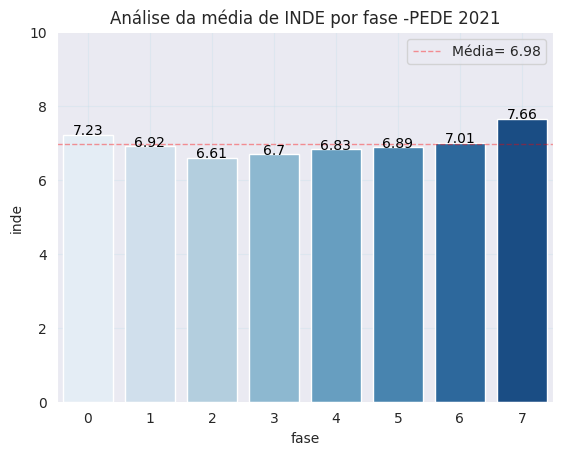

In [134]:
plt.title('Análise da média de INDE por fase -PEDE 2021')
x1 =  pd.DataFrame(df_2021[['nome', 'inde', 'fase']].groupby('fase')['inde'].mean())
media = x1.inde.values.mean()
sns.barplot(data=x1, x='fase', y='inde', palette='Blues')
for index, value in enumerate(x1.inde.values):
      plt.text(index, value, round(value, 2), color='black', ha="center")
plt.grid(alpha=0.2, color='lightblue')
plt.axhline(y =x1.inde.values.mean(),linewidth=1, color='r', label='Média= {:.2f}'.format(media),alpha=0.4 ,linestyle='dashed')
plt.legend()
plt.ylim(0,10)
plt.show()

Somente as médias das fases 1, 6 e 7 ultrapassaram a média geral do INDE.

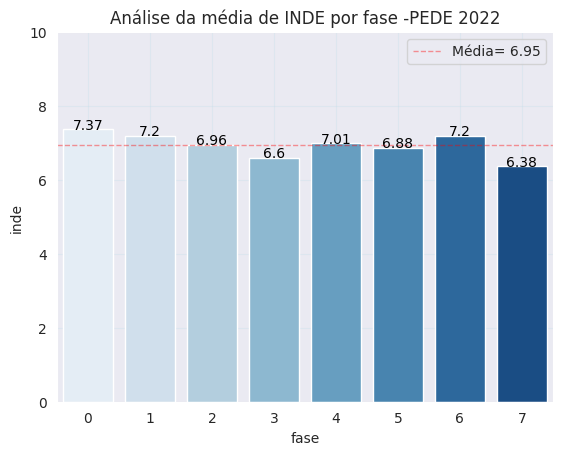

In [135]:
plt.title('Análise da média de INDE por fase -PEDE 2022')
x1 =  pd.DataFrame(df_2022[['nome', 'inde', 'fase']].groupby('fase')['inde'].mean())
media = x1.inde.values.mean()
sns.barplot(data=x1, x='fase', y='inde', palette='Blues')
for index, value in enumerate(x1.inde.values):
      plt.text(index, value, round(value, 2), color='black', ha="center")
plt.grid(alpha=0.2, color='lightblue')
plt.axhline(y =x1.inde.values.mean(),linewidth=1, color='r', label='Média= {:.2f}'.format(media),alpha=0.4 ,linestyle='dashed')
plt.legend()
plt.ylim(0,10)
plt.show()

As médias das fases 3, 5 e 7 ficaram abaixo da média geral do INDE.

In [136]:
df_2020[['nome','ano_ingresso','inde','bolsista']].groupby(['ano_ingresso','bolsista'])['inde'].mean()


ano_ingresso  bolsista
2016          0           6.846470
              1           7.626216
2017          0           6.761905
              1           7.829722
2018          0           6.875920
              1           7.940968
2019          0           7.304241
              1           8.240455
2020          0           7.366565
              1           6.953333
Name: inde, dtype: float32

Observamos que o INDE médio dos alunos bolsista é maior, exceto no grupo de alunos que ingressaram no ano de 2020 no projeto. Podemos entender que a bolsa de estudo pode estimular o aluno a obter melhores indíces ou que a educação particular, em detrimento a da escola pública, favorece ao desenvolvimento do aluno.

In [137]:
data=df_2020[['nome','ano_ingresso','inde','bolsista']].groupby(['bolsista','ano_ingresso'])['inde'].mean().round(2)
data

bolsista  ano_ingresso
0         2016            6.85
          2017            6.76
          2018            6.88
          2019            7.30
          2020            7.37
1         2016            7.63
          2017            7.83
          2018            7.94
          2019            8.24
          2020            6.95
Name: inde, dtype: float32

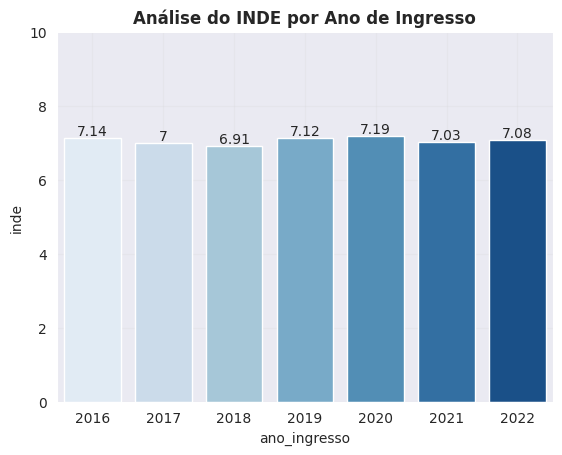

In [138]:
df = pd.DataFrame(df_por_aluno[['ano_ingresso','inde']].groupby(['ano_ingresso'])['inde'].mean().round(2))
ax= sns.barplot(df.reset_index(), x= 'ano_ingresso', y='inde', palette='Blues')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
ax.bar_label(ax.containers[6], fontsize=10)
plt.title('Análise do INDE por Ano de Ingresso', fontweight='bold')
plt.ylim(0,10)
plt.grid(color="lightgray", alpha=0.2)
plt.show()

As médias do INDE dos alunos, agrupadas por ano_ingresso no projeto, apresentam-se de forma bem equilibrada.

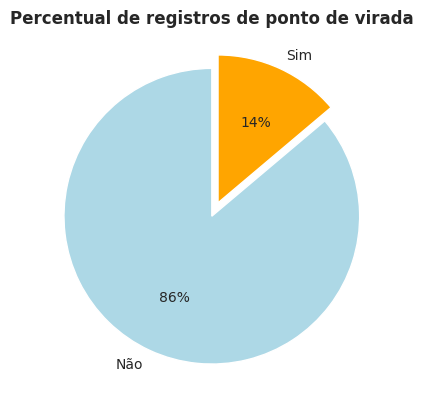

In [139]:
df =  df_final_passos.groupby('ponto_virada')['nome'].count()
df.index = ['Não', 'Sim']
explode = [0, 0.1]
ax = plt.pie(df, labels=['Não','Sim'],colors=['lightblue', 'orange'], autopct='%.0f%%', explode=explode, startangle=90)
plt.title('Percentual de registros de ponto de virada', fontweight='bold')
plt.show()

Observamos que apenas 14% dos registros obtiveram 'sim' para ao ponto de virada.

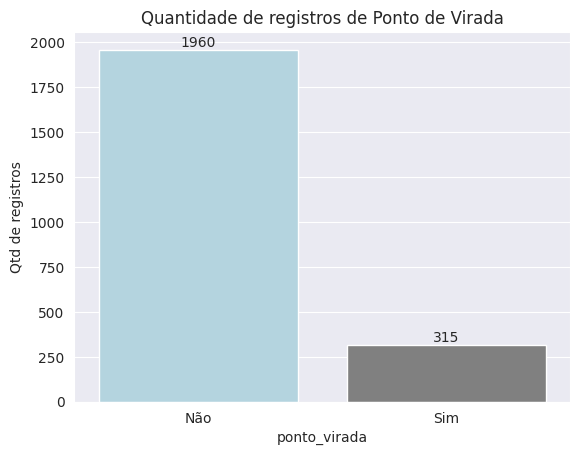

In [140]:
df =  df_final_passos.groupby('ponto_virada').size()
ax = sns.barplot(df, palette=['lightblue', 'gray'])
plt.title("Quantidade de registros de Ponto de Virada")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylabel('Qtd de registros')
ax.set_xticks(['0','1'], ['Não','Sim'])
plt.show()

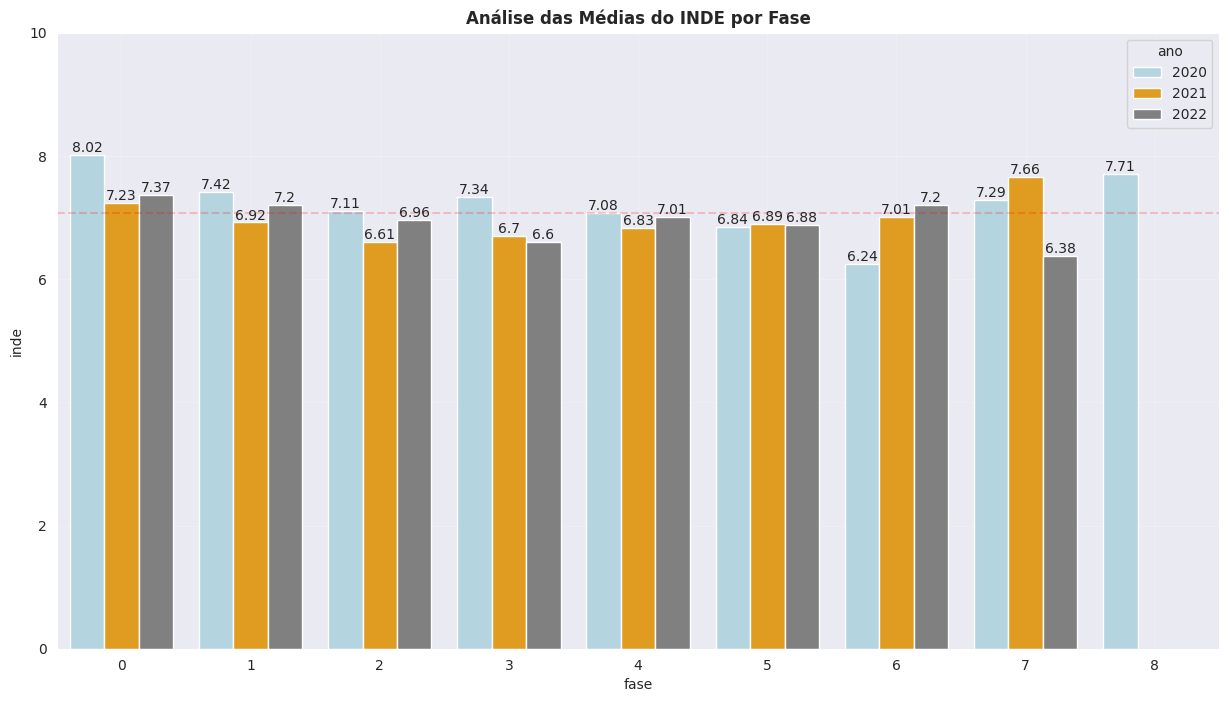

In [141]:
plt.figure(figsize=(15,8))
plt.title("Análise das Médias do INDE por Fase", fontweight='bold')
ax = sns.barplot(data=df_por_fase.reset_index(), x='fase', y='inde', hue='ano', legend=True, palette=['lightblue', 'orange', 'gray'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.axhline(df_final_passos['inde'].mean(), color='red', linestyle='--', alpha=0.2, label='Média Geral do INDE')
plt.grid(alpha=0.2)
plt.ylim(0,10)
plt.show()

Inicialmente podemos visualizar os dados da fase 8 só foram captados no ano de 2020. OS alunos da fase 3 apresentaram INDE abaixo da média nos três anos analisados, isso é um indicativo para que se promova esforços a fim de adequar o desenvolvimentos das crianças. Os alunos da fase 5 obtiveram pontuação abaixo da média geral em todo o período.

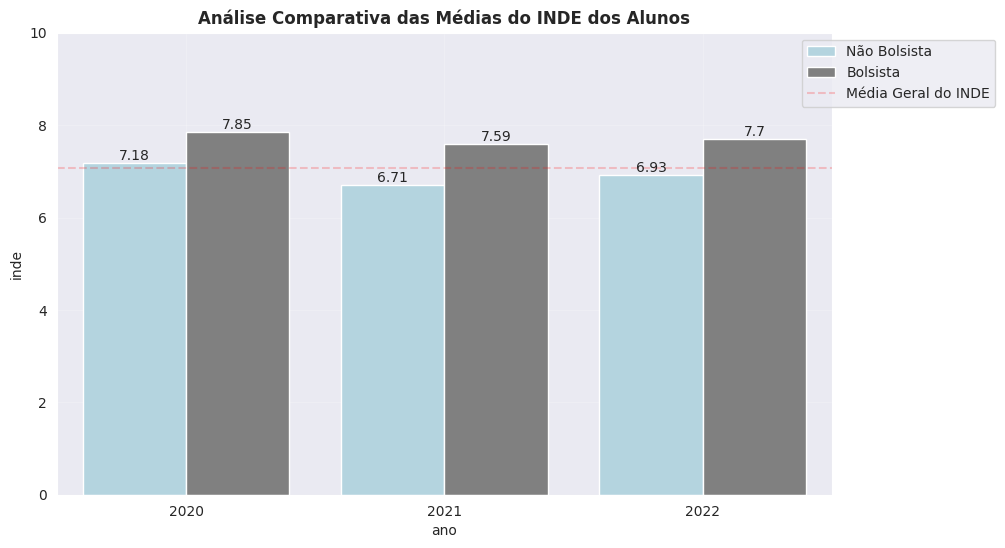

In [142]:
df = df_medias_bolsista_por_ano.copy()
df.index = pd.MultiIndex.from_tuples([('2020', 'Não Bolsista'),
            ('2020', 'Bolsista'),
            ('2021', 'Não Bolsista'),
            ('2021', 'Bolsista'),
            ('2022', 'Não Bolsista'),
            ('2022', 'Bolsista')], names=['ano', 'bolsista'])

plt.figure(figsize=(10,6))
plt.title("Análise Comparativa das Médias do INDE dos Alunos", fontweight='bold')
ax = sns.barplot(data=df, x='ano',y='inde', hue='bolsista', palette=['lightblue', 'gray'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.axhline(df_final_passos['inde'].mean(), color='red', linestyle='--', alpha=0.2, label='Média Geral do INDE')
plt.legend( bbox_to_anchor=(1.22,1))
plt.grid(alpha=0.2)
plt.ylim(0,10)
plt.show()

Observamos que as melhores médias de INDE são dos alunos bolsistas em todos os anos estudados. As médias de INDE de alunos não bolsistas no ano de 2020 ultrapassou a média geral dos alunos, contudo o mesmo não ocorreu em 2021 e 2022. O que pode ser um indicativo da necessidade de intensificar os esforços a fim de melhorar o índice nos anos subsequentes.

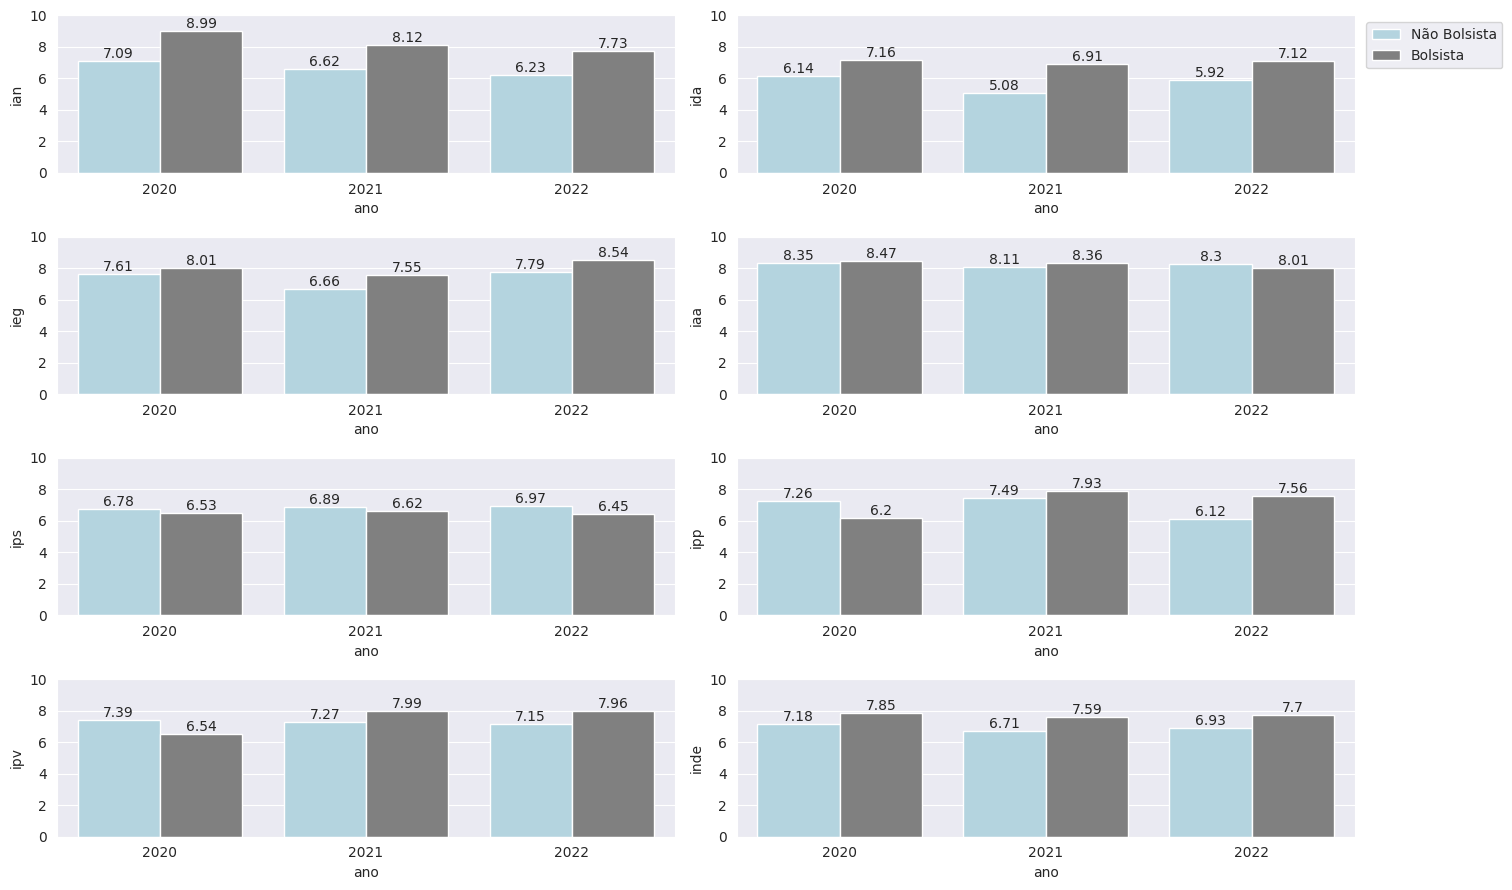

In [143]:
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(15,9), layout="constrained")

ax1 = sns.barplot(x='ano', y='ian', data=df, ax=axes[0][0], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax1.set_ylim(0,10)
ax1.bar_label(ax1.containers[0], fontsize=10)
ax1.bar_label(ax1.containers[1], fontsize=10)

ax2 = sns.barplot(x='ano', y='ida', data=df, ax=axes[0][1], hue='bolsista', palette=['lightblue', 'gray'])
ax2.set_ylim(0,10)
ax2.legend(bbox_to_anchor=(1.25,1), loc='upper right')
ax2.bar_label(ax2.containers[0], fontsize=10)
ax2.bar_label(ax2.containers[1], fontsize=10)

ax3 = sns.barplot(x='ano', y='ieg', data=df, ax=axes[1][0], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax3.set_ylim(0,10)
ax3.bar_label(ax3.containers[0], fontsize=10)
ax3.bar_label(ax3.containers[1], fontsize=10)

ax4 = sns.barplot(x='ano', y='iaa', data=df, ax=axes[1][1], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax4.set_ylim(0,10)
ax4.bar_label(ax4.containers[0], fontsize=10)
ax4.bar_label(ax4.containers[1], fontsize=10)

ax5 = sns.barplot(x='ano', y='ips', data=df, ax=axes[2][0], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax5.set_ylim(0,10)
ax5.bar_label(ax5.containers[0], fontsize=10)
ax5.bar_label(ax5.containers[1], fontsize=10)

ax6 = sns.barplot(x='ano', y='ipp', data=df, ax=axes[2][1], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax6.set_ylim(0,10)
ax6.bar_label(ax6.containers[0], fontsize=10)
ax6.bar_label(ax6.containers[1], fontsize=10)

ax7 = sns.barplot(x='ano', y='ipv', data=df, ax=axes[3][0], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax7.set_ylim(0,10)
ax7.bar_label(ax7.containers[0], fontsize=10)
ax7.bar_label(ax7.containers[1], fontsize=10)

ax8= sns.barplot(x='ano', y='inde', data=df, ax=axes[3][1], hue='bolsista',legend=False, palette=['lightblue', 'gray'])
ax8.set_ylim(0,10)
ax8.bar_label(ax8.containers[0], fontsize=10)
ax8.bar_label(ax8.containers[1], fontsize=10)

plt.tight_layout()
plt.show()

O gráfico acima expõe os índices médios por ano, dispostos em grupos de bolsistas e não bolsistas. Os bolsistas apresentaram melhores pontuações no IAN, IDA, IEG e INDE, em todos os anos avaliados. Os bolsistas, em 2022, tiveram menor  IAA do que os não bolsistas. Os valores médios de IPS  dos não bolsistas foram maiores, em todo o intervalo analisado. Os índices IPP  e IPV registraram, em 2020, uma média menor para os bolsistas, contudo o mesmo não ocorreu nos anos seguintes.

# Previsão

##Ideias

    Ideias:
      -Prever o INDE médio para os próximos anos
      -Prever Prever os indices futuros para os alunos
      -Classificação dos alunos para bolsista e ponto_virada
      -Prevendo a quantidade de novos alunos

##Análise de Correlação

<Axes: >

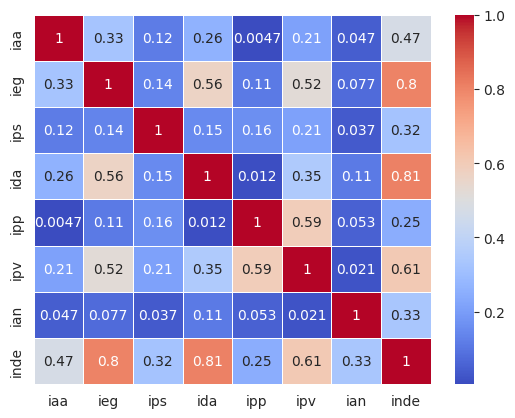

In [144]:
#Analisando a correlação

correlacao = df_final_passos[['iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde']].corr()
sns.heatmap(correlacao, linewidth=.5,annot=True, cmap='coolwarm')

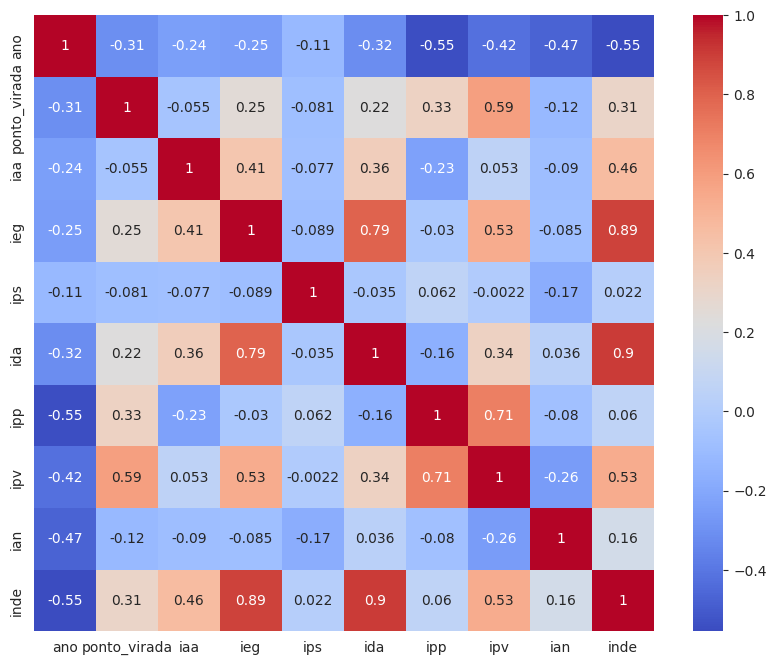

In [145]:
#Analisando as correlações
plt.figure(figsize=(10, 8))
correlacao_ = df_final_passos[['ano','ponto_virada', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'inde']].corr()
sns.heatmap(correlacao_.corr(), annot=True, cmap='coolwarm')
plt.show()

## Prever o incremento do INDE para os próximos anos


In [146]:
# Criar um modelo de regressão linear
model = LinearRegression()

# Preparar os dados para regressão
X = df_final_passos['ano'].values.reshape(-1, 1)
y = df_final_passos['inde'].values.reshape(-1, 1)

# Ajuste o modelo
model.fit(X, y)

# O coeficiente de 'ANO' em nosso modelo nos dirá a taxa de incremento por ano
coef_increment_per_year = model.coef_[0][0]
coef_increment_per_year


-0.12660795800422553

A regressão linear realizada entre o INDE e o ano indica um coeficiente de aproximadamente -0.1268. Isso significa que, de acordo com o modelo , existe uma tendência de diminuição do INDE médio por ano, contrariando o incremento observado entre 2021 e 2022.

## Classificação de Ponto de Virada com RandomForestClassifier

In [147]:
df_rfc = df_final_passos[[ 'ipp','ipv', 'inde', 'bolsista','ponto_virada']]
df_rfc['ponto_virada'] = df_rfc['ponto_virada'].replace('0','Não')
df_rfc['ponto_virada'] = df_rfc['ponto_virada'].replace('1','Sim')

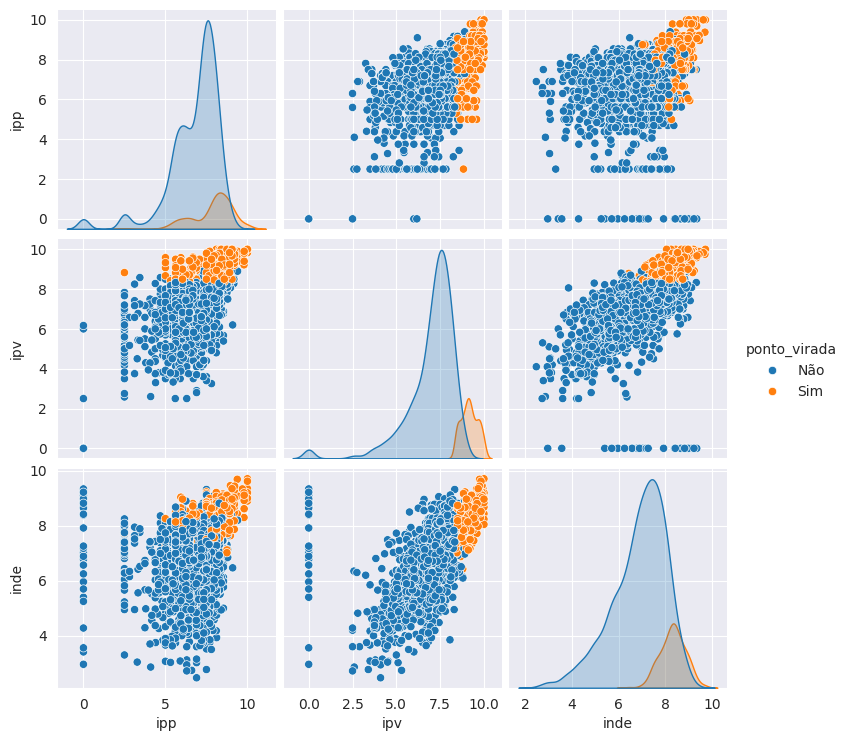

In [148]:
sns.pairplot(df_rfc, vars=[ 'ipp','ipv', 'inde'],hue="ponto_virada")

In [149]:
#Separando os dados
x = df_rfc.drop('ponto_virada', axis=1)
y = df_rfc['ponto_virada']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [150]:
rf = RandomForestClassifier(criterion= 'entropy', n_estimators=80, max_depth = 7, class_weight = 'balanced', random_state=7)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [151]:
estimator_rf = rf.estimators_
y_predito_random_forest = rf.predict(x_test)
print(accuracy_score(y_test, y_predito_random_forest))

0.9714285714285714


In [152]:
print (rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9829670329670329
0.9714285714285714


##Modelo de Classificação- Bolsista com Perceptron

In [153]:
df_model = df_final_passos[['bolsista','ponto_virada', 'inde', 'ian','ida', 'fase']]
df_model

,bolsista,ponto_virada,inde,ian,ida,fase
0,0,0,7.88,10.0,7.00,2
1,0,0,7.86,10.0,5.50,3
2,0,0,5.08,5.0,0.00,1
3,0,0,8.08,10.0,7.50,2
4,1,1,8.38,10.0,7.33,4
...,...,...,...,...,...,...
2270,0,0,8.15,10.0,7.75,2
2271,0,0,5.67,5.0,2.00,2
2272,0,1,8.14,5.0,9.00,0
2273,1,0,6.75,5.0,5.90,4


In [154]:
#Utilizando Label Enconder

label_enc = LabelEncoder()
df_model['bolsista'] = label_enc.fit_transform(df_model['bolsista'])
set(df_model['bolsista'])

{0, 1}

In [155]:

# Separação das features e da classe
X = df_model[['ponto_virada', 'inde', 'ian', 'ida', 'fase']]
y = df_model['bolsista']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [156]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(7)

# Definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 20
# Abrindo uma sequencia de neurônios
model = models.Sequential()

# input layer
# Entrada da rede
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        12
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.01
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summmary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


0epoch [00:00, ?epoch/s]

In [158]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 87.69% com 100 epochs de processamento


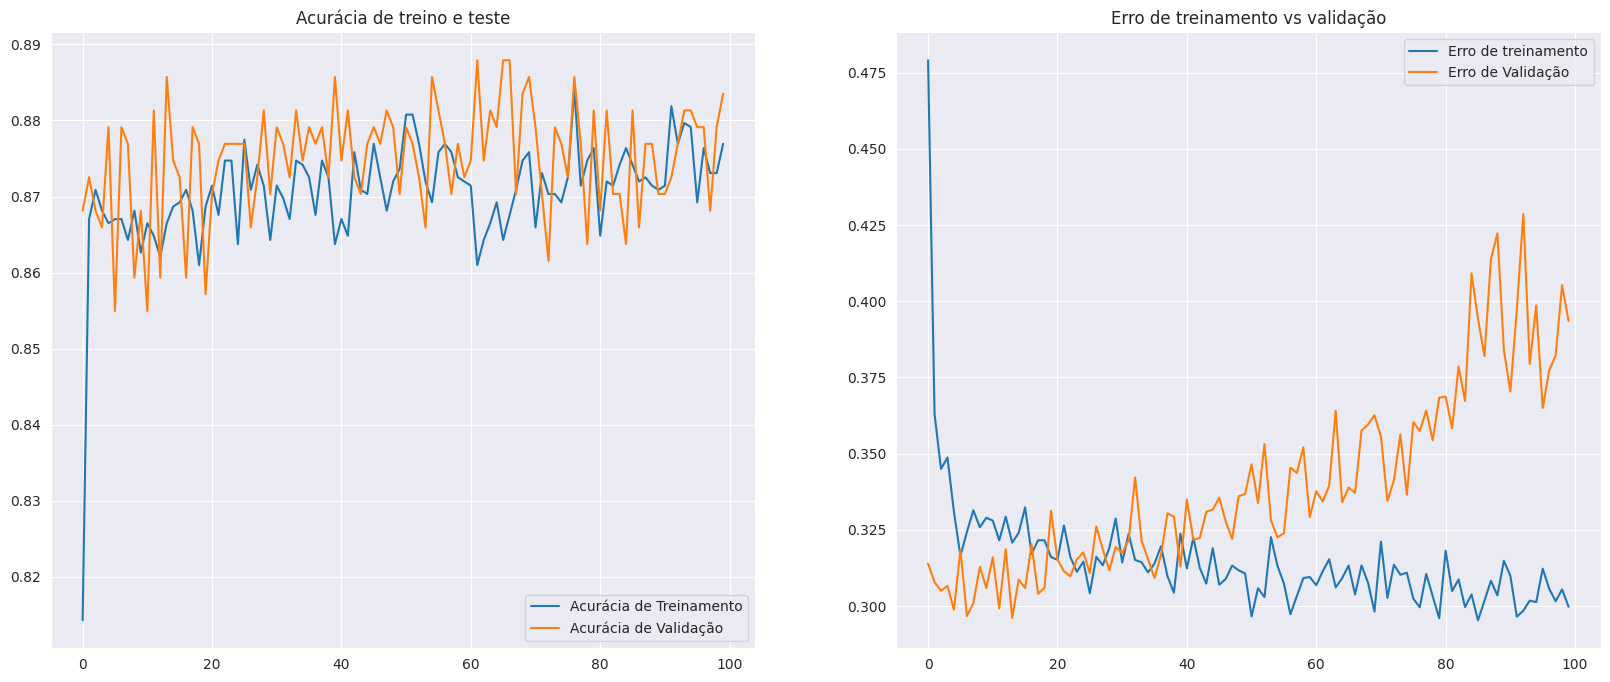

In [159]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [160]:

# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report

class_names =[]
for i in y.unique():
    class_names.append(label_enc.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       377
           1       0.77      0.46      0.58        78

    accuracy                           0.88       455
   macro avg       0.83      0.72      0.75       455
weighted avg       0.87      0.88      0.87       455



## Prevendo o número de  alunos para os anos subsequentes com Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptu5g814w/mo6nydux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptu5g814w/63v03c17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31467', 'data', 'file=/tmp/tmptu5g814w/mo6nydux.json', 'init=/tmp/tmptu5g814w/63v03c17.json', 'output', 'file=/tmp/tmptu5g814w/prophet_modeltps20nf5/prophet_model-20240813221610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

           ds        yhat
8  2024-01-01  543.016194
9  2025-01-01  557.379475
10 2026-01-01  610.020824
11 2027-01-01  659.954141
12 2028-01-01  707.168325
13 2029-01-01  721.531605


<Figure size 640x480 with 0 Axes>

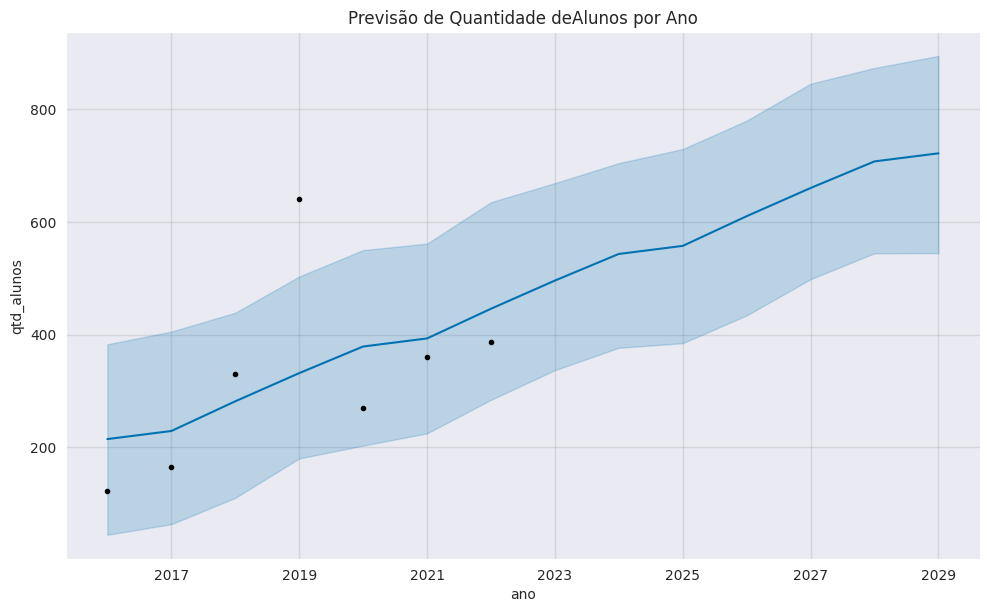

In [161]:
df = df_final_passos.groupby('ano_ingresso')['nome'].count()
df_aluno = pd.DataFrame(df)
df_aluno.columns = ['qtd_alunos']
df_aluno = df_aluno.reset_index()
df_aluno['ano_ingresso'] =  ['2016-01-01', '2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01', '2022-01-01']
df_aluno['ano_ingresso'] = pd.to_datetime(df_aluno['ano_ingresso'])
df_aluno.columns = ['ds', 'y']
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_aluno)
future_dates = modelo_prophet.make_future_dataframe(periods=7, freq='YS')
forecast = modelo_prophet.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast[['ds', 'yhat']].tail(6))
fig = plt.figure()
modelo_prophet.plot(forecast, xlabel='ano', ylabel='qtd_alunos')
plt.title('Previsão de Quantidade deAlunos por Ano')
plt.show()

Podemos visualizar uma previsão de aumento do ingresso de alunos para os próximos 5 anos, o que pode ser um indicativo para a instituição realizar planejamento de incremento de suas atividades institucionais.

##Classificação de Bolsista

In [162]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import RepeatedStratifiedKFold

In [163]:
svm = SVC()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()



In [164]:
df_model = df_final_passos[['bolsista','ponto_virada', 'inde', 'ian','ida', 'fase']]
df_model

,bolsista,ponto_virada,inde,ian,ida,fase
0,0,0,7.88,10.0,7.00,2
1,0,0,7.86,10.0,5.50,3
2,0,0,5.08,5.0,0.00,1
3,0,0,8.08,10.0,7.50,2
4,1,1,8.38,10.0,7.33,4
...,...,...,...,...,...,...
2270,0,0,8.15,10.0,7.75,2
2271,0,0,5.67,5.0,2.00,2
2272,0,1,8.14,5.0,9.00,0
2273,1,0,6.75,5.0,5.90,4


In [165]:
X = df_model.drop('bolsista', axis=1)
y = df_model['bolsista']

In [166]:
all_models = [
    ("Modelo: SVM - Support Vector Machine", svm),
    ("Modelo: Random Forest", rf),
    ("Modelo: KNN Classifier", knn),
    ("Modelo: MLP - Multi Layer Perceptron", mlp),

]

In [167]:
def benchmark_auc(model, X, y):
    scores = []
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores.append(cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
    media =  np.mean(scores)
    print(f'Média ROC_AUC : {media}')
    return np.mean(scores)

In [168]:
for name, model in all_models:
    print(name)
    benchmark_auc(model, X, y)

print("Resultados - ROC AUC - Concluídos")

Modelo: SVM - Support Vector Machine
Média ROC_AUC : 0.8437694150474531
Modelo: Random Forest
Média ROC_AUC : 0.8501953884167993
Modelo: KNN Classifier
Média ROC_AUC : 0.8372093744336786
Modelo: MLP - Multi Layer Perceptron
Média ROC_AUC : 0.8839214576935711
Resultados - ROC AUC - Concluídos


In [169]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size=0.2,random_state=42)

In [170]:
mlp.fit(X_treino, y_treino)

MLPClassifier()

In [171]:
print (pd.crosstab(y_teste, mlp.predict(X_teste), rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        364  13  377
1         38  40   78
All      402  53  455


In [172]:
print (classification_report(y_teste,mlp.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93       377
           1       0.75      0.51      0.61        78

    accuracy                           0.89       455
   macro avg       0.83      0.74      0.77       455
weighted avg       0.88      0.89      0.88       455



##Prevendo o incremento de valores dos indicadores do Aluno

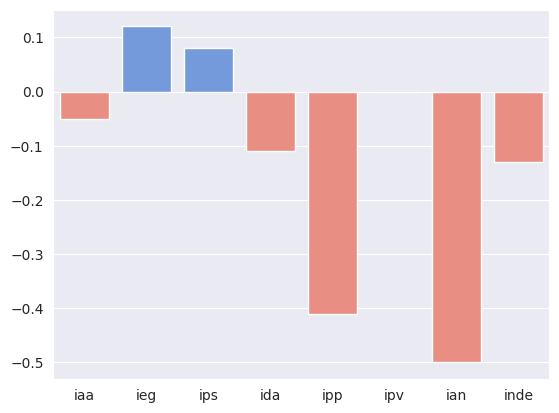

In [173]:

fig = plt.figure()

df_aluno = df_final_passos[df_final_passos['nome'] == id_aluno][['iaa', 'ieg', 'ips', 'ida', 'ipp','ipv', 'ian', 'inde']]

colunas = df_aluno.columns.tolist()


lista_inc = []


for col in colunas:
  # Criar um modelo de regressão linear
  model = LinearRegression()

  # Preparar os dados para regressão
  X = df_final_passos['ano'].values.reshape(-1, 1)
  y = df_final_passos[col].values.reshape(-1, 1)

  # Ajuste o modelo
  model.fit(X, y)


  # O coeficiente de 'ANO' em nosso modelo nos dirá a taxa de incremento por ano
  coef_increment_per_year = model.coef_[0][0]

  x = coef_increment_per_year.round(2)
  lista_inc.append(x)

def cor_da_barra(lista_inc: float) -> str:
  cor=[]
  for i in range(len(colunas)):
    if lista_inc[i] > 0:
        cor.append('#6495ED')
    else:
        cor.append("#FA8072")
  return cor
palette = cor_da_barra(lista_inc)
sns.barplot(x = colunas, y =lista_inc, palette=palette)
plt.show()